In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [2]:
# Чтоб числа вещественные выводились норм
pd.options.display.float_format ='{:,.2f}'.format

In [3]:
data_2021 = pd.read_csv('agents2021.csv')
data_2021

,Unnamed: 0,Наименование ДП,"Макс. ПДЗ за 2019 год, дней","Сред. ПДЗ за 2019 год, дней","Кол-во просрочек свыше 5-ти дней за 2019 год, шт.","Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.","Кол-во раз ПДЗ за 2019 год, шт.","Макс. ПДЗ за 2020 год, дней","Сред. ПДЗ за 2020 год, дней","Кол-во просрочек свыше 5-ти дней за 2020 год, шт.",...,Факт 7,Факт 12,Факт 14,Факт 15,Факт 16,Итого,ПДЗ 1-30,ПДЗ 31-90,ПДЗ 91-365,ПДЗ более 365
0,0,0,0,0.00,0,0.00,0,10,6.40,4,...,nan,nan,nan,nan,nan,5.00,0,0,1,1
1,1,2,7,5.50,1,"132,825.30",2,6,5.33,2,...,nan,nan,nan,nan,nan,25.00,0,0,1,1
2,2,4,2,2.00,0,0.00,2,1,1.00,0,...,nan,nan,nan,nan,nan,10.00,0,0,0,0
3,3,5,0,0.00,0,0.00,0,21,17.67,5,...,nan,nan,nan,nan,nan,20.00,0,0,0,1
4,4,6,0,0.00,0,0.00,0,0,0.00,0,...,nan,nan,nan,nan,nan,20.00,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,320,522,0,0.00,0,0.00,0,4,1.75,0,...,nan,nan,nan,nan,nan,10.00,1,0,0,0
321,321,523,0,0.00,0,0.00,0,0,0.00,0,...,nan,nan,nan,nan,nan,5.00,0,0,0,0
322,322,525,0,0.00,0,0.00,0,0,0.00,0,...,nan,nan,nan,nan,nan,65.00,1,0,0,0
323,323,527,0,0.00,0,0.00,0,0,0.00,0,...,nan,nan,nan,nan,nan,5.00,0,0,0,0


In [4]:
#Что в колонках Факт?
for col in data_2021.columns[95:131]:
    print(f'В колонке {col}: {325-data_2021[col].isna().sum()} значений и {data_2021[col].isna().sum()} пропусков')
# Получаестся:
# - колонки фактов 20, 21, 56, 15 и 16 - пустые. 
# - колонки 29, 49, 54, 59, 60 - от 40 объектов имеют этот признак со значением 10 в 29 и 5 в остальных.
# - остальные колоники - этот признак имеет всего до 13 объектов из 325 - вряд ли он оказывает существенное влияние,
# но надо проверить так как его вес у этих объектов очень большой 

В колонке Факт. 20: 0 значений и 325 пропусков
В колонке Факт. 21: 0 значений и 325 пропусков
В колонке Факт.32: 2 значений и 323 пропусков
В колонке Факт.31: 13 значений и 312 пропусков
В колонке Факт.23: 5 значений и 320 пропусков
В колонке Факт 24: 2 значений и 323 пропусков
В колонке Факт 27: 1 значений и 324 пропусков
В колонке Факт 33: 6 значений и 319 пропусков
В колонке Факт 28: 2 значений и 323 пропусков
В колонке Факт 29: 40 значений и 285 пропусков
В колонке Факт 30: 4 значений и 321 пропусков
В колонке Факт 40: 1 значений и 324 пропусков
В колонке Факт 41: 1 значений и 324 пропусков
В колонке Факт 42: 2 значений и 323 пропусков
В колонке Факт 46: 4 значений и 321 пропусков
В колонке Факт 48: 2 значений и 323 пропусков
В колонке Факт 49: 226 значений и 99 пропусков
В колонке Факт 50: 5 значений и 320 пропусков
В колонке Факт 51: 10 значений и 315 пропусков
В колонке Факт 54: 146 значений и 179 пропусков
В колонке Факт 55: 7 значений и 318 пропусков
В колонке Факт 56: 0 значе

In [5]:
# Посмотрим итоговую сумму по колонкам с фактами
for col in data_2021.columns[95:131]:
    if data_2021[col].sum()>0:
        print(f'{col} Сумма {data_2021[col].sum()}  для {325-data_2021[col].isna().sum()} знач. => 1 = {data_2021[col].sum()/(325-data_2021[col].isna().sum())}')

Факт.32 Сумма 80.0  для 2 знач. => 1 = 40.0
Факт.31 Сумма 520.0  для 13 знач. => 1 = 40.0
Факт.23 Сумма 150.0  для 5 знач. => 1 = 30.0
Факт 24 Сумма 60.0  для 2 знач. => 1 = 30.0
Факт 27 Сумма 30.0  для 1 знач. => 1 = 30.0
Факт 33 Сумма 180.0  для 6 знач. => 1 = 30.0
Факт 28 Сумма 60.0  для 2 знач. => 1 = 30.0
Факт 29 Сумма 400.0  для 40 знач. => 1 = 10.0
Факт 30 Сумма 120.0  для 4 знач. => 1 = 30.0
Факт 40 Сумма 50.0  для 1 знач. => 1 = 50.0
Факт 41 Сумма 50.0  для 1 знач. => 1 = 50.0
Факт 42 Сумма 160.0  для 2 знач. => 1 = 80.0
Факт 46 Сумма 200.0  для 4 знач. => 1 = 50.0
Факт 48 Сумма 20.0  для 2 знач. => 1 = 10.0
Факт 49 Сумма 1130.0  для 226 знач. => 1 = 5.0
Факт 50 Сумма 50.0  для 5 знач. => 1 = 10.0
Факт 51 Сумма 50.0  для 10 знач. => 1 = 5.0
Факт 54 Сумма 730.0  для 146 знач. => 1 = 5.0
Факт 55 Сумма 35.0  для 7 знач. => 1 = 5.0
Факт 57 Сумма 20.0  для 1 знач. => 1 = 20.0
Факт 58 Сумма 33.0  для 11 знач. => 1 = 3.0
Факт 59 Сумма 440.0  для 88 знач. => 1 = 5.0
Факт 60 Сумма 520.

In [6]:
# Удалю колонки фактов 20, 21, 56, 15 и 16 - пустые.
data_2021 = data_2021.drop(['Факт. 20', 'Факт. 21', 'Факт 56', 'Факт 15', 'Факт 16'], axis=1)

In [7]:
# В остальных фактах заполню NaN - 0
for col in data_2021.columns[95:126]:
    if 'Факт' in col:
        data_2021[col] = data_2021[col].fillna(0)

In [8]:
# Пропуски в колонке Итого (сумма всех фактов).
data_2021.isna().sum()

Unnamed: 0                                            0
Наименование ДП                                       0
Макс. ПДЗ за 2019 год, дней                           0
Сред. ПДЗ за 2019 год, дней                           0
Кол-во просрочек свыше 5-ти дней за 2019 год, шт.     0
                                                     ..
Итого                                                26
ПДЗ 1-30                                              0
ПДЗ 31-90                                             0
ПДЗ 91-365                                            0
ПДЗ более 365                                         0
Length: 131, dtype: int64

In [9]:
# В колонке Итого, где пропуски - это значит все факты имеют значение 0 => проверим это и заполним пропуски 0 
data_2021[data_2021['Итого'].isna()][['Факт.32', 'Факт.31', 'Факт.23', 'Факт 24', 'Факт 27', 'Факт 33',
       'Факт 28', 'Факт 29', 'Факт 30', 'Факт 40', 'Факт 41', 'Факт 42',
       'Факт 46', 'Факт 48', 'Факт 49', 'Факт 50', 'Факт 51', 'Факт 54',
       'Факт 55', 'Факт 57', 'Факт 58', 'Факт 59', 'Факт 60', 'Факт 37',
       'Факт 39', 'Факт 1', 'Факт 2', 'Факт 3', 'Факт 7', 'Факт 12',
       'Факт 14']].sum().sum()

0.0

In [10]:
data_2021['Итого'] = data_2021['Итого'].fillna(0)

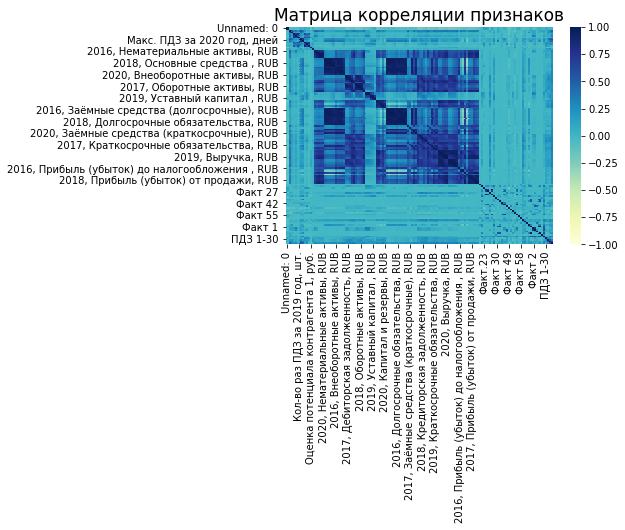

In [11]:
# Встречаются сильно скоррелированные между собой признаки. 
heatmap = sns.heatmap(data_2021.corr(), vmin=-1, vmax=1, cmap="YlGnBu")
heatmap.set_title('Матрица корреляции признаков', fontsize=17); 

### Создадим target переменные:

In [12]:
data_2021['target_2021 01'] = data_2021['ПДЗ 1-30'] + data_2021['ПДЗ 31-90'] + \
                              data_2021['ПДЗ 91-365'] + data_2021['ПДЗ более 365']
data_2021['target_2021 01'] = data_2021['target_2021 01'].apply(lambda x: -1 if x == 0 else 1)

In [13]:
data_2021['target_2019 01'] = data_2021['Макс. ПДЗ за 2019 год, дней'].apply(lambda x: -1 if x == 0 else 1)
data_2021['target_2020 01'] = data_2021['Макс. ПДЗ за 2020 год, дней'].apply(lambda x: -1 if x == 0 else 1)

In [14]:
# Есть задолженность и какой срок или нет 0, 1(1-30), 2(31-90), 3(31-365), 4(от 366)
def target_01234(row):
    if row['ПДЗ более 365'] == 1:
        return 4
    elif row['ПДЗ 91-365'] == 1:
        return 3
    elif row['ПДЗ 31-90'] == 1:
        return 2
    elif row['ПДЗ 1-30'] == 1:
        return 1
    else:
        return 0
    
data_2021['target_2021 01234'] = data_2021.apply(lambda row: target_01234(row), axis=1)

In [15]:
def separation_periods(num):
    """Функция расчета периода задолженности"""
    if num == 0:
        return 0
    elif num < 31:
        return 1
    elif num < 91:
        return 2
    elif num < 366:
        return 3
    else:
        return 4

    

data_2021['target_2019 01234'] = data_2021['Макс. ПДЗ за 2019 год, дней'].apply(separation_periods)

data_2021['target_2020 01234'] = data_2021['Макс. ПДЗ за 2020 год, дней'].apply(separation_periods)

In [16]:
# Есть задолженность и какой срок или нет 0, 1(1-30), 2(свыше 31)
def target_012(row):
    if row['ПДЗ более 365'] == 1:
        return 2
    elif row['ПДЗ 91-365'] == 1:
        return 2
    elif row['ПДЗ 31-90'] == 1:
        return 2
    elif row['ПДЗ 1-30'] == 1:
        return 1
    else:
        return 0
    
data_2021['target_2021 012'] = data_2021.apply(lambda row: target_012(row), axis=1)

In [17]:
def separation_periods_012(num):
    """Функция расчета периода задолженности"""
    if num == 0:
        return 0
    elif num < 31:
        return 1
    else:
        return 2
    
data_2021['target_2019 012'] = data_2021['Макс. ПДЗ за 2019 год, дней'].apply(separation_periods_012)

data_2021['target_2020 012'] = data_2021['Макс. ПДЗ за 2020 год, дней'].apply(separation_periods_012)

In [18]:
# Что это - не поняла
data_2021[['Оценка потенциала контрагента 1, руб.', 'Оценка потенциала контрагента 2, руб.']]

,"Оценка потенциала контрагента 1, руб.","Оценка потенциала контрагента 2, руб."
0,"3,715,286.62","3,715,286.62"
1,0.00,"15,923,566.88"
2,"19,638,853.50","10,084,713.38"
3,"159,235,668.79","6,369,426.75"
4,"3,184,713.38","3,184,713.38"
...,...,...
320,"5,095,541.40","5,095,541.40"
321,0.00,"262,420.38"
322,"3,184,713.38","3,184,713.38"
323,"5,095,541.40","5,095,541.40"


In [19]:
# Практически все действующии. Давать в долг организациям, находящимся в сосотоянии банкротства нет смысла. 
# Этот признак не учитываем
data_2021['Статус'].value_counts()

Действующая                322
В состоянии банкротства      3
Name: Статус, dtype: int64

## Приступаем к формированию новых признаков

На основании "Методоглогических указаний по проведению анализа финансового состояния организаций" (приказ ФСФО .от 23 января 2001г. № 16) в качестве признаков расчитаем коэффициенты платежеспособности и финансовой устойчивсти. 

Платежеспособность характеризует возможность организации своевременно расплачиваться по своим обязательствам.

In [20]:
def features_financial_ratios(data, year):
    """
    Расчет показателей, характеризующих различные аспекты деятельности организации:
    1. Общие показатели:
    К_1 - среднемесячная выручка;
    
    2. Расчет показателей платежеспособности и финансовой устойчивости:
    К_4 - степень платежеспособности общая;
    К_5 - коэффициент задолженности по кредитам банков и займам;
    К_6 - коэффициент задолженности другим организациям;
    К_9 - степень платежеспособности по текущим обязательствам;
    К_10 - коэффициент покрытия текущих обязательств оборотными активами;
    К_11 - собственный капитал в обороте;
    К_12 - доля собственного капитала в оборотных средствах (коэффициент обеспеченности собственными средствами);
    К_13 - коэффициент автономии (финансовой независимости).
    
    3. Показатели эффективности использования капитала
    К_14 - коэффициент обеспеченности оборотными средствами;
    К_17 - рентабельность оборотного капитала;
    К_18 - рентабельность продаж;
    К_20 - эффективность внеоборотного капитала (фондоотдача);
    """
    for i in year:
        data['f1_590 {}'.format(i)] = (data['{}, Заёмные средства (долгосрочные), RUB'.format(i)] 
                                     + data['{}, Долгосрочные обязательства, RUB'.format(i)])
        
        data['f1_690 {}'.format(i)] = (data['{}, Заёмные средства (краткосрочные), RUB'.format(i)] 
                                     + data['{}, Кредиторская задолженность, RUB'.format(i)] 
                                     + data['{}, Краткосрочные обязательства, RUB'.format(i)])
                
        data['f1_290 {}'.format(i)] = (data['{}, Дебиторская задолженность, RUB'.format(i)]
                                     + data['{}, Оборотные активы, RUB'.format(i)])
        
        data['f1_490 {}'.format(i)] = (data['{}, Капитал и резервы, RUB'.format(i)]
                                     + data['{}, Уставный капитал , RUB'.format(i)])
        
        data['f1_190 {}'.format(i)] = (data['{}, Нематериальные активы, RUB'.format(i)] 
                                     + data['{}, Основные средства , RUB'.format(i)] 
                                     + data['{}, Внеоборотные активы, RUB'.format(i)])
        
        
        data['K_1 {}'.format(i)] = data['{}, Выручка, RUB'.format(i)] / 12
        
        data['K_4 {}'.format(i)] = (data['f1_590 {}'.format(i)] + data['f1_690 {}'.format(i)]) / (data['K_1 {}'.format(i)]+1)
        
        data['K_5 {}'.format(i)] = (data['{}, Заёмные средства (краткосрочные), RUB'.format(i)]
                                  + data['f1_590 {}'.format(i)]) / (data['K_1 {}'.format(i)]+1)
        
        data['K_6 {}'.format(i)] =  data['{}, Кредиторская задолженность, RUB'.format(i)] / (data['K_1 {}'.format(i)]+1)
        
        data['K_9 {}'.format(i)] = data['f1_690 {}'.format(i)] / (data['K_1 {}'.format(i)]+1)
        
        data['K_10 {}'.format(i)] = data['f1_290 {}'.format(i)] / (data['f1_690 {}'.format(i)]+1)
                                           
        data['K_11 {}'.format(i)] = data['f1_490 {}'.format(i)] - data['f1_190 {}'.format(i)]
        
        data['K_12 {}'.format(i)] = (data['f1_490 {}'.format(i)] - data['f1_190 {}'.format(i)]) / (data['f1_290 {}'.format(i)]+1)
        
        data['K_13 {}'.format(i)] = data['f1_490 {}'.format(i)] / (data['f1_190 {}'.format(i)]) + (data['f1_290 {}'.format(i)]+1)
        
        data['K_14 {}'.format(i)] = data['f1_290 {}'.format(i)] / (data['K_1 {}'.format(i)]+1)
        
        data['K_17 {}'.format(i)] = data['{}, Прибыль (убыток) до налогообложения , RUB'.format(i)]*0.8 / (data['f1_290 {}'.format(i)]+1)
        # За минусом налога на прибыль
        
        data['K_18 {}'.format(i)] = data['{}, Прибыль (убыток) от продажи, RUB'.format(i)] / (data['{}, Выручка, RUB'.format(i)]+1)
        
        data['K_20 {}'.format(i)] = data['K_1 {}'.format(i)] / (data['f1_190 {}'.format(i)]+1)
    
    
    return data
# Если сгруппированные по группам показатели не нужны, то в функции, после расчета прописать их удаление

In [21]:
# Доавим признаки платежеспособности
data_2021 = features_financial_ratios(data_2021, [2016, 2017, 2018, 2019, 2020])

Рассмотрим получившиеся коэффициенты:

In [22]:
# К_4 - степень платежеспособности общая
data_2021[['K_4 2016', 'K_4 2017', 'K_4 2018', 'K_4 2019', 'K_4 2020']].describe()

,K_4 2016,K_4 2017,K_4 2018,K_4 2019,K_4 2020
count,325.00,325.00,325.00,325.00,325.00
mean,"8,632,009.08","5,036,980.82","23,746,163.70","609,568,131.57","1,727,998,821.87"
std,"94,797,415.65","59,399,098.29","376,696,005.88","10,926,686,040.34","30,604,013,429.46"
min,0.00,0.00,0.00,0.00,0.00
25%,1.53,2.08,3.05,3.52,3.84
50%,4.87,5.51,6.20,6.57,7.13
75%,12.05,11.87,12.76,13.09,15.58
max,"1,384,094,904.46","886,467,515.92","6,728,755,414.01","196,983,929,936.31","551,663,007,643.31"


Медианное значение Коэффициента К_4 (степень платежеспособности общая) с каждым годом растет с 4,87 до 7,13.

In [23]:
# Контрагенты с сильно неадекватными значениями
data_2021[data_2021['K_4 2016']>100][['Макс. ПДЗ за 2019 год, дней', 
                                     'Сред. ПДЗ за 2019 год, дней', 
                                     'Кол-во просрочек свыше 5-ти дней за 2019 год, шт.', 
                                     'Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.', 
                                     'Кол-во раз ПДЗ за 2019 год, шт.', 
                                     'Статус',
                                     '2016, Заёмные средства (долгосрочные), RUB',
                                     '2016, Долгосрочные обязательства, RUB', 
                                     '2016, Заёмные средства (краткосрочные), RUB',
                                     '2016, Кредиторская задолженность, RUB',
                                     '2016, Краткосрочные обязательства, RUB',
                                     'K_1 2016', 'K_1 2017', 'K_1 2018', 'K_1 2019', 'K_1 2020',
                                     'K_4 2016', 'K_4 2017', 'K_4 2018', 'K_4 2019', 'K_4 2020']]

,"Макс. ПДЗ за 2019 год, дней","Сред. ПДЗ за 2019 год, дней","Кол-во просрочек свыше 5-ти дней за 2019 год, шт.","Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.","Кол-во раз ПДЗ за 2019 год, шт.",Статус,"2016, Заёмные средства (долгосрочные), RUB","2016, Долгосрочные обязательства, RUB","2016, Заёмные средства (краткосрочные), RUB","2016, Кредиторская задолженность, RUB",...,K_1 2016,K_1 2017,K_1 2018,K_1 2019,K_1 2020,K_4 2016,K_4 2017,K_4 2018,K_4 2019,K_4 2020
9,14,4.12,3,"525,143.36",8,Действующая,0.00,0.00,0.00,"7,351,321,656.05",...,"82,918,046.71","142,841,188.96","142,119,426.75","190,360,987.26","167,040,552.02",192.36,104.14,84.15,57.93,70.25
18,0,0.00,0,0.00,0,Действующая,"99,336,305.73","244,973,885.35","311,564,331.21","5,507,407,006.37",...,"17,430,520.17","513,050,902.34","1,357,977,600.85","1,096,300,318.47","1,004,766,188.96",687.81,151.84,89.89,164.24,141.69
37,91,91.00,1,"108,901.22",1,Действующая,"19,348,611,464.97","46,424,588,535.03","10,129,608,280.25","8,163,727,388.54",...,"563,343,418.26","394,504,405.52","920,712,791.93",0.00,0.00,187.22,248.03,124.90,0.00,0.00
41,0,0.00,0,0.00,0,Действующая,"122,038,216.56","122,378,980.89","101,705,732.48","220,492,356.69",...,0.00,0.00,0.00,0.00,0.00,"888,813,375.80","886,467,515.92","938,147,133.76","6,659,235.67","7,043,949.04"
120,15,15.00,1,"158,226.65",1,Действующая,"744,162,524,840.76","755,096,672,611.46","1,086,092,356.69","19,693,940,764.33",...,"562,373,513.80","730,595,912.95","9,679,425,371.55","13,071,021,284.50","12,110,236,624.20","2,740.14","2,948.42",276.64,177.48,231.29
157,116,37.75,4,"335,266.55",4,Действующая,"22,798,926,751.59","23,339,121,019.11",636.94,"1,759,318,471.34",...,"1,851,167.73","201,175,796.18","1,846,385,934.18","2,936,985,403.40","2,204,106,369.43","27,150.83",389.62,49.54,44.75,62.45
178,0,0.00,0,0.00,0,Действующая,"54,905,095.54","54,905,095.54","1,966,878.98","27,994,267.52",...,"1,476,804.67","44,743,789.81","50,950,636.94","97,361,252.65","155,810,721.87",115.10,12.73,12.37,9.42,10.22
184,854,112.47,22,"34,551,022.24",32,Действующая,"24,153,160,509.55","26,262,482,165.61","50,076,140,127.39","3,716,719,745.22",...,"642,094,798.30","3,239,405,891.72","6,662,496,284.50","7,508,017,515.92","5,177,947,823.78",246.56,57.21,23.43,20.76,32.36
198,6,2.49,11,"6,690,821.69",113,Действующая,0.00,0.00,0.00,"8,994,904.46",...,"64,012.74","66,679,830.15","184,198,673.04","297,664,437.37","347,706,157.11",284.02,5.54,5.72,3.87,11.82
205,17,8.79,9,"22,814,187.13",14,Действующая,0.00,"884,713.38",0.00,"26,799,363.06",...,0.00,0.00,"8,363,057.32","14,595,169.85","129,609,076.43","476,460,509.55","583,731,847.13","1,536.51","4,755.46","1,177.64"


Но есть неадекватные значения этого коэффициента, полуенные в результате большой суммы заемных средств и кредиторской задолженности на фоне отсутствия или относительно низкой средней ежемесячной выручки (К_1)

In [24]:
# К_5 - коэффициент задолженности по кредитам банков и займам
data_2021[['K_5 2016', 'K_5 2017', 'K_5 2018', 'K_5 2019', 'K_5 2020']].describe()

,K_5 2016,K_5 2017,K_5 2018,K_5 2019,K_5 2020
count,325.00,325.00,325.00,325.00,325.00
mean,"3,108,967.66","1,571,730.45","1,228,034.76","568,604,586.67","1,613,067,912.98"
std,"41,396,551.78","21,316,871.39","19,704,169.29","10,250,611,826.27","29,076,923,282.75"
min,-0.00,-0.00,-0.00,0.00,0.00
25%,0.00,0.00,0.05,0.24,0.31
50%,0.42,0.57,0.97,1.18,1.32
75%,3.07,2.93,3.73,3.93,4.42
max,"662,245,222.93","351,443,949.04","352,273,885.35","184,795,535,668.79","524,191,856,687.90"


In [25]:
# К_6 - коэффициент задолженности другим организациям
data_2021[['K_6 2016', 'K_6 2017', 'K_6 2018', 'K_6 2019', 'K_6 2020']].describe()

,K_6 2016,K_6 2017,K_6 2018,K_6 2019,K_6 2020
count,325.00,325.00,325.00,325.00,325.00
mean,"1,650,686.61","1,164,114.08","11,092,214.85","20,389,372.11","57,256,774.76"
std,"19,109,418.42","14,792,015.92","187,051,090.40","337,810,306.13","805,516,485.72"
min,0.00,0.00,0.00,0.00,0.00
25%,0.52,0.59,0.93,1.10,1.13
50%,1.42,1.54,1.75,1.76,1.98
75%,3.40,3.51,3.48,3.75,3.71
max,"263,023,566.88","213,997,452.23","3,364,377,707.01","6,066,140,127.39","13,674,061,146.50"


C коэффициентами К_5 задолженности по кредитам банков и займам и К_6 та же картина. Так как числитель К_4 разбит между ними, а знаменатель таже среднемесячная выручка.

In [26]:
# К_9 - степень платежеспособности по текущим обязательствам
data_2021[['K_9 2016', 'K_9 2017', 'K_9 2018', 'K_9 2019', 'K_9 2020']].describe()

,K_9 2016,K_9 2017,K_9 2018,K_9 2019,K_9 2020
count,325.00,325.00,325.00,325.00,325.00
mean,"5,835,983.30","3,797,570.95","22,850,789.03","40,963,716.90","114,930,909.91"
std,"59,691,258.95","47,959,136.27","375,104,508.96","678,739,264.60","1,617,688,278.01"
min,0.00,0.00,0.00,0.00,0.00
25%,1.37,1.71,2.36,2.74,2.92
50%,3.71,4.33,4.82,5.09,5.42
75%,9.10,8.91,9.09,9.78,9.94
max,"721,849,681.53","642,052,229.30","6,728,755,414.01","12,188,394,267.52","27,471,150,955.41"


In [27]:
# Контрагенты с сильно неадекватными значениями
data_2021[data_2021['K_9 2016']>50][['K_9 2016', 'K_9 2017', 'K_9 2018', 'K_9 2019', 'K_9 2020']]

,K_9 2016,K_9 2017,K_9 2018,K_9 2019,K_9 2020
9,192.36,104.14,84.15,57.93,70.25
18,668.06,19.13,47.92,143.37,113.40
37,70.47,45.84,91.86,0.00,0.00
39,53.00,29.93,27.98,39.70,30.17
41,"644,396,178.34","642,052,229.30","693,856,050.96","6,323,566.88","6,708,280.25"
120,74.19,78.97,37.51,13.10,24.51
150,80.66,83.23,55.05,70.64,52.89
157,"2,227.09",318.04,6.04,7.84,31.55
184,168.04,9.68,3.51,19.38,9.20
197,60.49,15.37,"1,302.41","24,085.51",102.09


В дальнейшем мы увидим, что у  коэффициентов К_4, К_5, K_6, K_9, K_14 сильная корреляция между собой

In [28]:
# К_10 - коэффициент покрытия текущих обязательств оборотными активами
data_2021[['K_10 2016', 'K_10 2017', 'K_10 2018', 'K_10 2019', 'K_10 2020']].describe()

,K_10 2016,K_10 2017,K_10 2018,K_10 2019,K_10 2020
count,325.00,325.00,325.00,325.00,325.00
mean,79.76,2.02,1.53,1.67,1.76
std,863.08,9.30,1.96,2.22,3.77
min,0.00,0.00,0.00,0.00,0.00
25%,0.60,0.60,0.75,0.80,0.80
50%,0.91,0.91,1.02,1.04,1.06
75%,1.46,1.57,1.56,1.69,1.65
max,"12,738.85",159.60,21.36,26.68,55.83


In [29]:
# Контрагенты с сильно неадекватными значениями
data_2021[data_2021['K_10 2016']>5][['K_10 2016', 'K_10 2017', 'K_10 2018', 'K_10 2019', 'K_10 2020']]

,K_10 2016,K_10 2017,K_10 2018,K_10 2019,K_10 2020
1,7.17,6.55,5.18,3.36,2.46
13,6.31,6.58,6.30,5.68,6.20
16,7.29,3.26,3.25,6.99,2.19
20,9.94,13.75,3.35,2.37,0.09
26,7.24,5.58,4.94,5.49,4.60
46,5.79,8.35,6.76,3.81,3.09
90,12.25,1.84,4.88,9.18,5.68
97,6.52,5.05,5.59,4.70,3.66
109,5.32,9.82,10.15,7.14,3.84
122,5.88,2.95,2.54,3.28,3.21


In [30]:
# К_11 - собственный капитал в обороте
data_2021[['K_11 2016', 'K_11 2017', 'K_11 2018', 'K_11 2019', 'K_11 2020']].describe()

,K_11 2016,K_11 2017,K_11 2018,K_11 2019,K_11 2020
count,325.00,325.00,325.00,325.00,325.00
mean,"-9,636,185,667.81","-11,168,159,172.95","-13,806,094,392.94","-13,946,198,651.64","-16,911,073,908.87"
std,"87,484,086,768.64","115,516,895,122.82","136,624,743,752.46","125,201,638,124.63","138,828,400,624.15"
min,"-1,457,929,882,802.55","-1,990,376,301,273.89","-2,358,238,410,828.02","-2,151,747,539,490.45","-2,331,416,882,802.55"
25%,"-39,279,617.83","-49,180,891.72","-102,107,643.31","-123,723,566.88","-148,148,407.64"
50%,0.00,0.00,0.00,"-1,557,961.78","-3,167,515.92"
75%,"19,278,980.89","22,449,044.59","35,946,496.82","38,925,477.71","40,487,261.15"
max,"7,803,092,993.63","8,704,197,452.23","9,188,563,057.32","8,888,157,324.84","6,937,942,038.22"


In [31]:
# К_12 - доля собственного капитала в оборотных средствах (коэффициент обеспеченности собственными средствами)
data_2021[['K_12 2016', 'K_12 2017', 'K_12 2018', 'K_12 2019', 'K_12 2020']].describe()

,K_12 2016,K_12 2017,K_12 2018,K_12 2019,K_12 2020
count,325.00,325.00,325.00,325.00,325.00
mean,-0.41,-0.31,-0.41,-0.37,-0.52
std,2.81,3.04,2.00,1.76,2.50
min,-46.33,-43.04,-29.24,-21.91,-29.84
25%,-0.20,-0.22,-0.34,-0.33,-0.34
50%,0.00,0.00,0.00,-0.01,-0.02
75%,0.10,0.12,0.12,0.13,0.15
max,2.00,26.90,2.73,2.28,0.98


In [32]:
# К_13 - коэффициент автономии (финансовой независимости)
# Очень странные дает результаты. В обучении может путать модель. Не будем его брать на обучение
data_2021[['K_13 2016', 'K_13 2017', 'K_13 2018', 'K_13 2019', 'K_13 2020']].describe()

,K_13 2016,K_13 2017,K_13 2018,K_13 2019,K_13 2020
count,270.00,277.00,307.00,320.00,318.00
mean,inf,nan,nan,inf,inf
std,nan,nan,nan,nan,nan
min,"1,834,396.12",-inf,-inf,"1,231,209.40","1,613,375.01"
25%,"72,058,126.48","83,398,090.55","87,302,867.66","97,414,527.09","113,646,020.89"
50%,"364,325,479.47","338,954,778.51","379,475,818.81","388,038,701.20","442,556,690.95"
75%,"3,156,262,916.19","2,285,836,944.40","2,469,316,563.40","2,467,065,447.39","2,750,370,861.27"
max,inf,inf,inf,inf,inf


In [33]:
# К_14 - коэффициент обеспеченности оборотными средствами
data_2021[['K_14 2016', 'K_14 2017', 'K_14 2018', 'K_14 2019', 'K_14 2020']].describe()

,K_14 2016,K_14 2017,K_14 2018,K_14 2019,K_14 2020
count,325.00,325.00,325.00,325.00,325.00
mean,"4,953,277.46","2,784,053.74","4,627,817.30","157,883,322.47","68,465,107.45"
std,"48,831,086.20","35,483,898.69","55,960,648.45","2,790,964,893.92","1,113,286,058.77"
min,0.00,0.00,0.00,0.00,0.00
25%,2.19,2.47,3.43,3.94,4.17
50%,4.88,5.15,5.31,5.99,6.52
75%,10.18,9.96,9.72,10.17,10.51
max,"605,308,917.20","604,989,808.92","760,780,254.78","50,310,762,420.38","19,964,747,770.70"


In [34]:
# К_17 - рентабельность оборотного капитала
data_2021[['K_17 2016', 'K_17 2017', 'K_17 2018', 'K_17 2019', 'K_17 2020']].describe()

,K_17 2016,K_17 2017,K_17 2018,K_17 2019,K_17 2020
count,325.00,325.00,325.00,325.00,325.00
mean,0.09,0.07,0.07,0.09,0.07
std,0.34,0.19,0.37,0.20,0.32
min,-0.66,-0.85,-5.26,-0.46,-1.90
25%,0.00,0.00,0.01,0.01,0.01
50%,0.02,0.02,0.03,0.03,0.03
75%,0.07,0.08,0.09,0.10,0.09
max,4.49,2.21,1.61,1.57,3.35


In [35]:
# К_18 - рентабельность продаж
data_2021[['K_18 2016', 'K_18 2017', 'K_18 2018', 'K_18 2019', 'K_18 2020']].describe()

,K_18 2016,K_18 2017,K_18 2018,K_18 2019,K_18 2020
count,325.00,325.00,325.00,325.00,325.00
mean,-297.86,"-1,983.29","-52,456.61",-950.49,-401.70
std,"5,370.35","19,422.24","914,480.68","12,616.05","7,242.90"
min,"-96,815.29","-273,248.41","-16,482,165.61","-200,000.00","-130,573.25"
25%,0.00,0.00,0.01,0.01,0.01
50%,0.02,0.02,0.03,0.03,0.03
75%,0.06,0.06,0.07,0.07,0.08
max,0.68,0.63,0.66,0.66,0.69


In [36]:
# Контрагенты с сильно неадекватными значениями
data_2021[data_2021['K_18 2019']<-1][['K_18 2016', 'K_18 2017', 'K_18 2018', 'K_18 2019', 'K_18 2020']]

,K_18 2016,K_18 2017,K_18 2018,K_18 2019,K_18 2020
41,"-96,815.29","-129,299.36","-170,700.64","-108,917.20","-130,573.25"
197,0.18,-0.09,-4.58,-3.26,0.25
304,0.00,"-83,439.49",-3.33,-1.28,-0.59
317,0.00,"-273,248.41","-16,482,165.61",-7.88,-0.65
319,0.00,"-158,598.73","-395,541.40","-200,000.00",0.00


In [37]:
# К_20 - эффективность внеоборотного капитала (фондоотдача)
data_2021[['K_20 2016', 'K_20 2017', 'K_20 2018', 'K_20 2019', 'K_20 2020']].describe()

,K_20 2016,K_20 2017,K_20 2018,K_20 2019,K_20 2020
count,325.00,325.00,325.00,325.00,325.00
mean,"544,909.15","778,976.19","905,896.26","855,183.34","1,037,314.49"
std,"4,462,065.37","5,281,442.00","5,652,463.01","7,363,233.45","9,317,060.67"
min,-15.88,0.00,0.00,0.00,0.00
25%,0.04,0.05,0.11,0.16,0.16
50%,0.33,0.40,0.55,0.59,0.48
75%,1.54,1.96,2.31,2.18,1.86
max,"62,167,993.63","65,278,503.18","49,355,148.62","118,819,055.20","152,973,354.56"


In [38]:
# Контрагенты с сильно неадекватными значениями
data_2021[data_2021['K_20 2016']>20][['K_20 2016', 'K_20 2017', 'K_20 2018', 'K_20 2019', 'K_20 2020']]

,K_20 2016,K_20 2017,K_20 2018,K_20 2019,K_20 2020
88,24.70,26.52,"31,849,150.74","28,125,477.71","21,840,976.65"
115,880.11,17.70,30.80,56.85,139.98
116,"5,816,242.04","6,551,273.89","7,998,566.88","8,869,214.44","9,786,411.89"
117,184.29,405.14,6.51,8.91,3.95
131,"10,242,887.47","11,409,660.30",3.21,4.65,5.67
132,47.81,66.02,168.39,"14,314,225.05",5.01
138,55.39,67.93,80.82,100.88,2.15
143,196.81,73.70,56.28,102.64,416.56
152,63.41,99.49,766.47,"118,819,055.20","152,973,354.56"
158,42.64,95.15,110.54,160.34,124.19


По всем кооэффициентам можно сделать вывод, что если значение силно отклоняется от медианного, то значит там отсутсвуют какие-то показатели или резкий скачек по ним. Необходимо отобрать этих контрагентов и изучить их более внимательно, чтоб откорректировать значение. Т.к. в текущем варианте это выглядит как выбросы.

In [39]:
# Логарифмируем показатели (чтоб нормальное распределение сделать), так как они потом пойдут в обучающие выборки
data_2021['Оценка потенциала контрагента 1, руб.'] = np.log(data_2021['Оценка потенциала контрагента 1, руб.']+1)
data_2021['Оценка потенциала контрагента 2, руб.'] = np.log(data_2021['Оценка потенциала контрагента 2, руб.']+1)

### Корреляция

Рассмотрим корреляцию между признаками, чтоб не включать в обучающую выборку сильно скоррелированные признаки.

In [40]:
data_2021[['Оценка потенциала контрагента 1, руб.', 'Оценка потенциала контрагента 2, руб.']].corr()

,"Оценка потенциала контрагента 1, руб.","Оценка потенциала контрагента 2, руб."
"Оценка потенциала контрагента 1, руб.",1.00,0.33
"Оценка потенциала контрагента 2, руб.",0.33,1.00


<AxesSubplot:>

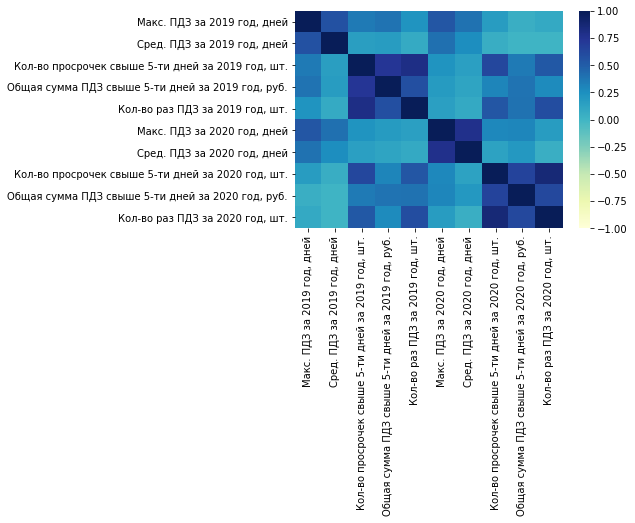

In [41]:
data_2021_corr_dolg = data_2021[['Макс. ПДЗ за 2019 год, дней',
 'Сред. ПДЗ за 2019 год, дней',
 'Кол-во просрочек свыше 5-ти дней за 2019 год, шт.',
 'Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.',
 'Кол-во раз ПДЗ за 2019 год, шт.',
 'Макс. ПДЗ за 2020 год, дней',
 'Сред. ПДЗ за 2020 год, дней',
 'Кол-во просрочек свыше 5-ти дней за 2020 год, шт.',
 'Общая сумма ПДЗ свыше 5-ти дней за 2020 год, руб.',
 'Кол-во раз ПДЗ за 2020 год, шт.']].corr()

sns.heatmap(data_2021_corr_dolg, vmin=-1, vmax=1, cmap="YlGnBu")


<AxesSubplot:>

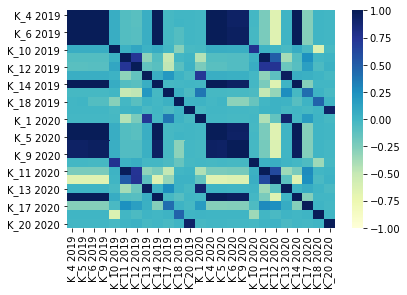

In [42]:
data_2021_corr = data_2021[['K_4 2019', 'K_5 2019', 'K_6 2019', 'K_9 2019', 'K_10 2019', 'K_11 2019', 'K_12 2019', 'K_13 2019',
    'K_14 2019', 'K_17 2019', 'K_18 2019', 'K_20 2019', 'K_1 2020', 'K_4 2020', 'K_5 2020', 'K_6 2020', 'K_9 2020',
    'K_10 2020', 'K_11 2020', 'K_12 2020', 'K_13 2020', 'K_14 2020', 'K_17 2020', 'K_18 2020', 'K_20 2020']].corr()
sns.heatmap(data_2021_corr, vmin=-1, vmax=1, cmap="YlGnBu")

# Часть признаков сильно скоррелирована между собой. 

In [43]:
data_2021[['K_4 2019', 'K_5 2019', 'K_6 2019', 'K_9 2019', 'K_10 2019', 'K_11 2019', 'K_12 2019', 'K_13 2019',
    'K_14 2019', 'K_17 2019', 'K_18 2019', 'K_20 2019', ]].corr()

,K_4 2019,K_5 2019,K_6 2019,K_9 2019,K_10 2019,K_11 2019,K_12 2019,K_13 2019,K_14 2019,K_17 2019,K_18 2019,K_20 2019
K_4 2019,1.00,1.00,1.00,1.00,0.06,-0.07,-0.10,0.05,1.00,-0.02,-0.00,-0.01
K_5 2019,1.00,1.00,1.00,1.00,0.06,-0.07,-0.10,0.05,1.00,-0.02,0.00,-0.01
K_6 2019,1.00,1.00,1.00,1.00,0.06,-0.07,-0.09,0.05,1.00,-0.02,-0.08,-0.01
K_9 2019,1.00,1.00,1.00,1.00,0.06,-0.07,-0.09,0.05,1.00,-0.02,-0.08,-0.01
K_10 2019,0.06,0.06,0.06,0.06,1.00,0.03,0.11,0.03,0.06,-0.00,-0.28,-0.03
K_11 2019,-0.07,-0.07,-0.07,-0.07,0.03,1.00,0.74,-0.30,-0.07,-0.50,-0.01,0.01
K_12 2019,-0.10,-0.10,-0.09,-0.09,0.11,0.74,1.00,-0.13,-0.10,-0.47,-0.09,0.03
K_13 2019,0.05,0.05,0.05,0.05,0.03,-0.30,-0.13,1.00,0.05,0.20,0.02,-0.04
K_14 2019,1.00,1.00,1.00,1.00,0.06,-0.07,-0.10,0.05,1.00,-0.02,-0.01,-0.01
K_17 2019,-0.02,-0.02,-0.02,-0.02,-0.00,-0.50,-0.47,0.20,-0.02,1.00,0.03,-0.04


Сильная корреляция 1 или около нее у коэффициентов К_4, К_5, K_6, K_9, K_14. Необходимо оставить только один. Вернемся выше и посмотрим какой из них лучше. 

Предположительно K_9

In [44]:
data_2021[['f1_590 2016', 'f1_690 2016', 'f1_290 2016', 'f1_490 2016', 'f1_190 2016']].corr()

,f1_590 2016,f1_690 2016,f1_290 2016,f1_490 2016,f1_190 2016
f1_590 2016,1.00,0.44,0.36,0.27,0.98
f1_690 2016,0.44,1.00,0.81,0.64,0.48
f1_290 2016,0.36,0.81,1.00,0.72,0.35
f1_490 2016,0.27,0.64,0.72,1.00,0.37
f1_190 2016,0.98,0.48,0.35,0.37,1.00


In [45]:
data_2021_corr_f1 = data_2021[['f1_590 2017', 'f1_690 2017', 'f1_290 2017', 'f1_490 2017', 'f1_190 2017']].corr()
data_2021_corr_f1

,f1_590 2017,f1_690 2017,f1_290 2017,f1_490 2017,f1_190 2017
f1_590 2017,1.00,0.33,0.27,0.02,0.98
f1_690 2017,0.33,1.00,0.69,0.66,0.46
f1_290 2017,0.27,0.69,1.00,0.69,0.30
f1_490 2017,0.02,0.66,0.69,1.00,0.16
f1_190 2017,0.98,0.46,0.30,0.16,1.00


<AxesSubplot:>

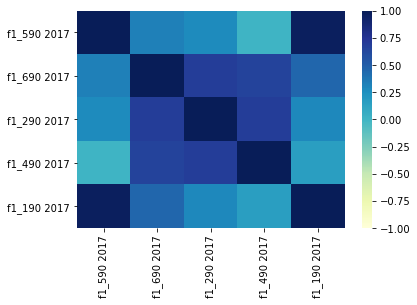

In [46]:
sns.heatmap(data_2021_corr_f1, vmin=-1, vmax=1, cmap="YlGnBu")

f1_590 и f1_190 имеют сильную корреляцию.

Рассмотрим как влияет сочетание пар признаков на целевую переменную. Есть ли по каким-либо параметрам четкое разделение на классы.

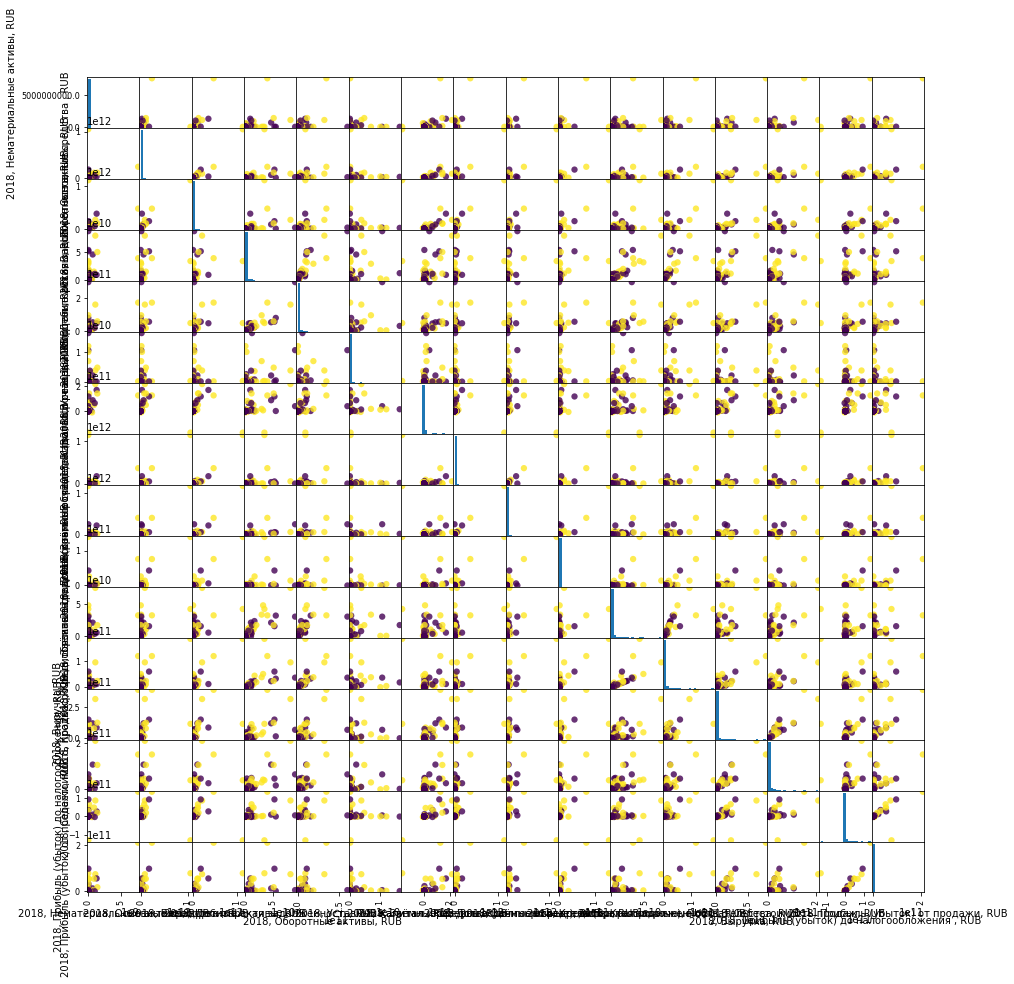

In [47]:
# По данным бухгалтерского учета за год 
scat_mtrx = pd.plotting.scatter_matrix(data_2021[['2018, Нематериальные активы, RUB',
                                                  '2018, Основные средства , RUB',
                                                  '2018, Внеоборотные активы, RUB',
                                                  '2018, Дебиторская задолженность, RUB',
                                                  '2018, Оборотные активы, RUB',
                                                  '2018, Уставный капитал , RUB',
                                                  '2018, Капитал и резервы, RUB',
                                                  '2018, Заёмные средства (долгосрочные), RUB',
                                                  '2018, Долгосрочные обязательства, RUB',
                                                  '2018, Заёмные средства (краткосрочные), RUB',
                                                  '2018, Кредиторская задолженность, RUB',
                                                  '2018, Краткосрочные обязательства, RUB',
                                                  '2018, Выручка, RUB',
                                                  '2018, Себестоимость продаж, RUB',
                                                  '2018, Прибыль (убыток) до налогообложения , RUB',
                                                  '2018, Прибыль (убыток) от продажи, RUB']], c=data_2021['target_2019 01'], figsize=(15, 15),
                                       marker='o', hist_kwds={'bins': 20}, s=40, alpha=.8)

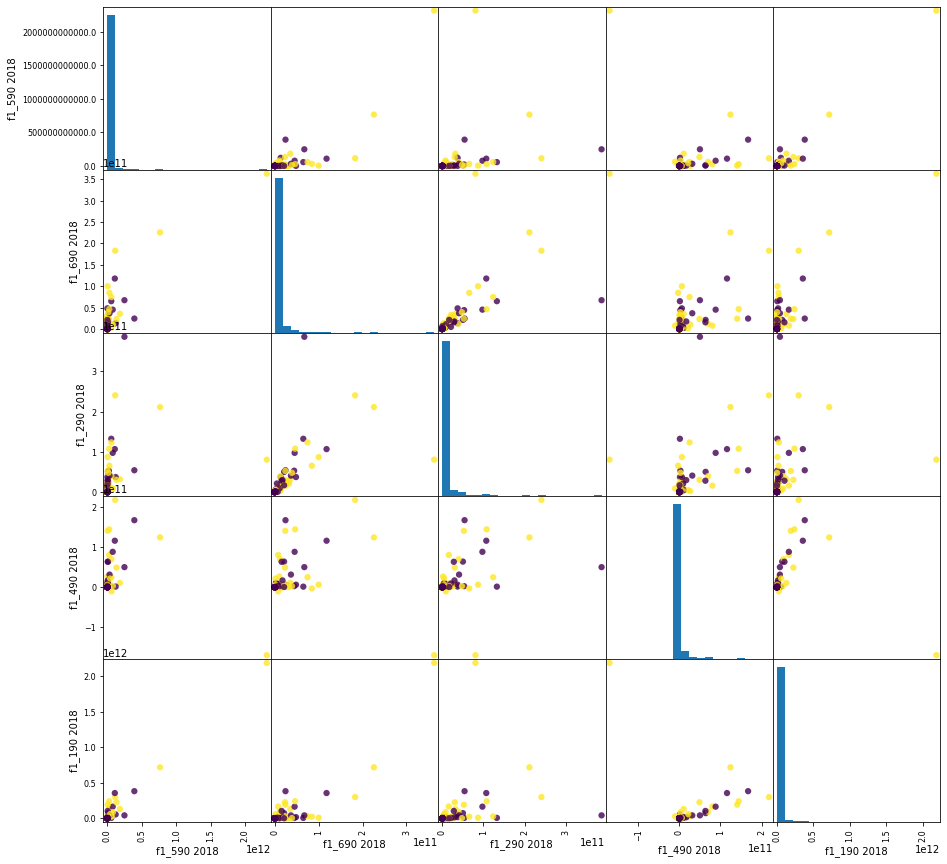

In [48]:
# По объединенным данным  
scat_mtrx = pd.plotting.scatter_matrix(data_2021[['f1_590 2018', 'f1_690 2018', 'f1_290 2018',
       'f1_490 2018', 'f1_190 2018']], c=data_2021['target_2019 01'], figsize=(15, 15),
                                      marker='o', hist_kwds={'bins':20}, s=40, alpha=.8)


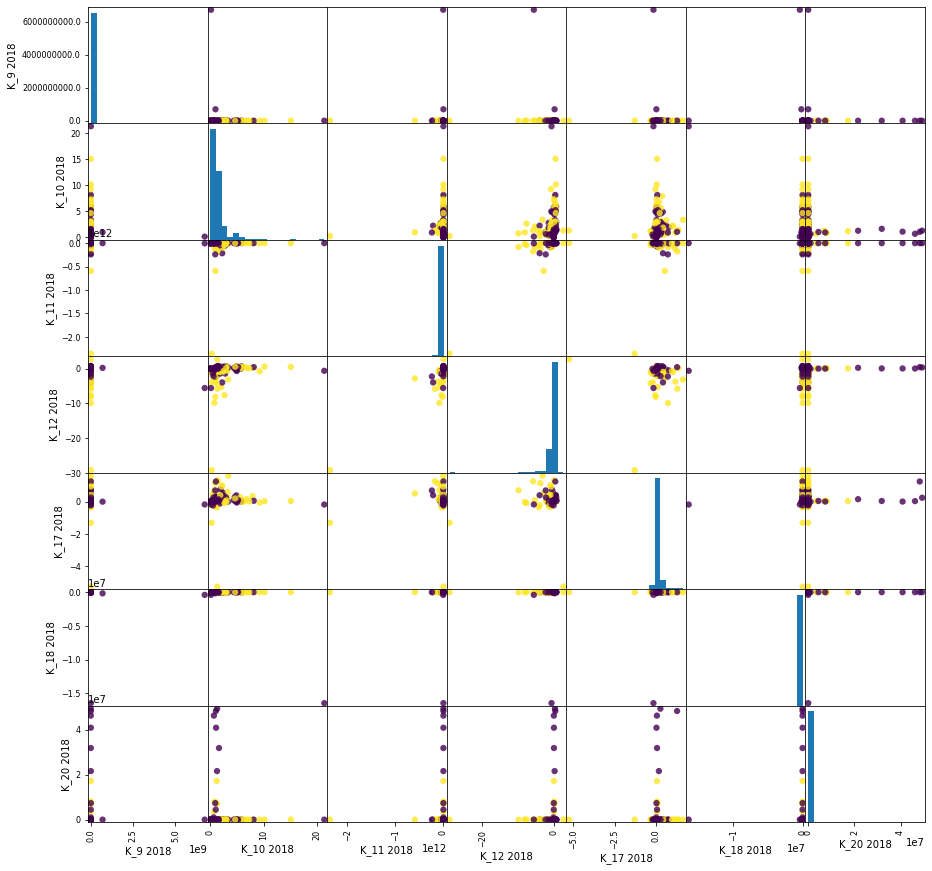

In [49]:
# По коэффициентам
scat_mtrx = pd.plotting.scatter_matrix(data_2021[['K_9 2018', 'K_10 2018', 'K_11 2018', 'K_12 2018',
       'K_17 2018', 'K_18 2018', 'K_20 2018']], c=data_2021['target_2019 01'], figsize=(15, 15),
                                      marker='o', hist_kwds={'bins':20}, s=40, alpha=.8)


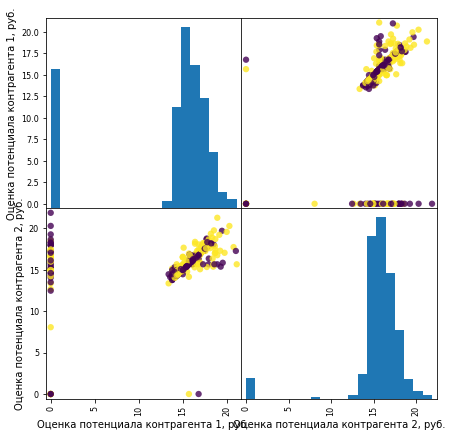

In [50]:
# 2019 год 
scat_mtrx = pd.plotting.scatter_matrix(data_2021[['Оценка потенциала контрагента 1, руб.',
       'Оценка потенциала контрагента 2, руб.']], c=data_2021['target_2019 01'], figsize=(7, 7),
                                      marker='o', hist_kwds={'bins':20}, s=40, alpha=.8)

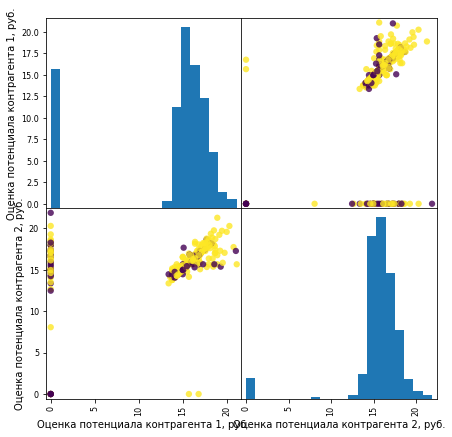

In [51]:
# 2020 год
scat_mtrx = pd.plotting.scatter_matrix(data_2021[['Оценка потенциала контрагента 1, руб.',
       'Оценка потенциала контрагента 2, руб.']], c=data_2021['target_2020 01'], figsize=(7, 7),
                                      marker='o', hist_kwds={'bins':20}, s=40, alpha=.8)

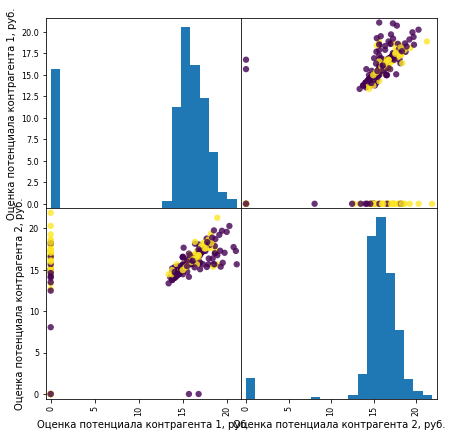

In [52]:
# 2021 год
scat_mtrx = pd.plotting.scatter_matrix(data_2021[['Оценка потенциала контрагента 1, руб.',
       'Оценка потенциала контрагента 2, руб.']], c=data_2021['target_2021 01'], figsize=(7, 7),
                                      marker='o', hist_kwds={'bins':20}, s=40, alpha=.8)

**! Нет четкого признака по которому можно разделить модели. Попробуем обучить разные модели на том, что есть и дальше посмотрим еще признаки**

### Обучение модели

Так как если модель будет использоваться на предприятии, то данные о контрагентах чаще всего получить можно прошлогодние, а не текущие. И наша модель должна рассчитывать возможность просрочки основываясь на показатели прошлых периодов.

Для target_2019 возьмем года 2016-2018 - Проверять будем на targete_2020 и годах 2017-2019

Для target_2020 возьмем года 2017-2019 - Проверять будем на targete_2021 и годах 2018-2020


In [53]:
log_list =  ['2016, Нематериальные активы, RUB',
             '2017, Нематериальные активы, RUB',
             '2018, Нематериальные активы, RUB',
             '2019, Нематериальные активы, RUB',
             '2020, Нематериальные активы, RUB',
             '2016, Основные средства , RUB',
             '2017, Основные средства , RUB',
             '2018, Основные средства , RUB',
             '2019, Основные средства , RUB',
             '2020, Основные средства , RUB',
             '2016, Внеоборотные активы, RUB',
             '2017, Внеоборотные активы, RUB',
             '2018, Внеоборотные активы, RUB',
             '2019, Внеоборотные активы, RUB',
             '2020, Внеоборотные активы, RUB',
             '2016, Дебиторская задолженность, RUB',
             '2017, Дебиторская задолженность, RUB',
             '2018, Дебиторская задолженность, RUB',
             '2019, Дебиторская задолженность, RUB',
             '2020, Дебиторская задолженность, RUB',
             '2016, Оборотные активы, RUB',
             '2017, Оборотные активы, RUB',
             '2018, Оборотные активы, RUB',
             '2019, Оборотные активы, RUB',
             '2020, Оборотные активы, RUB',
             '2016, Уставный капитал , RUB',
             '2017, Уставный капитал , RUB',
             '2018, Уставный капитал , RUB',
             '2019, Уставный капитал , RUB',
             '2020, Уставный капитал , RUB',
             '2016, Капитал и резервы, RUB',
             '2017, Капитал и резервы, RUB',
             '2018, Капитал и резервы, RUB',
             '2019, Капитал и резервы, RUB',
             '2020, Капитал и резервы, RUB',
             '2016, Заёмные средства (долгосрочные), RUB',
             '2017, Заёмные средства (долгосрочные), RUB',
             '2018, Заёмные средства (долгосрочные), RUB',
             '2019, Заёмные средства (долгосрочные), RUB',
             '2020, Заёмные средства (долгосрочные), RUB',
             '2016, Долгосрочные обязательства, RUB',
             '2017, Долгосрочные обязательства, RUB',
             '2018, Долгосрочные обязательства, RUB',
             '2019, Долгосрочные обязательства, RUB',
             '2020, Долгосрочные обязательства, RUB',
             '2016, Заёмные средства (краткосрочные), RUB',
             '2017, Заёмные средства (краткосрочные), RUB',
             '2018, Заёмные средства (краткосрочные), RUB',
             '2019, Заёмные средства (краткосрочные), RUB',
             '2020, Заёмные средства (краткосрочные), RUB',
             '2016, Кредиторская задолженность, RUB',
             '2017, Кредиторская задолженность, RUB',
             '2018, Кредиторская задолженность, RUB',
             '2019, Кредиторская задолженность, RUB',
             '2020, Кредиторская задолженность, RUB',
             '2016, Краткосрочные обязательства, RUB',
             '2017, Краткосрочные обязательства, RUB',
             '2018, Краткосрочные обязательства, RUB',
             '2019, Краткосрочные обязательства, RUB',
             '2020, Краткосрочные обязательства, RUB',
             '2016, Выручка, RUB',
             '2017, Выручка, RUB',
             '2018, Выручка, RUB',
             '2019, Выручка, RUB',
             '2020, Выручка, RUB',
             '2016, Себестоимость продаж, RUB',
             '2017, Себестоимость продаж, RUB',
             '2018, Себестоимость продаж, RUB',
             '2019, Себестоимость продаж, RUB',
             '2020, Себестоимость продаж, RUB',
             '2016, Прибыль (убыток) до налогообложения , RUB',
             '2017, Прибыль (убыток) до налогообложения , RUB',
             '2018, Прибыль (убыток) до налогообложения , RUB',
             '2019, Прибыль (убыток) до налогообложения , RUB',
             '2020, Прибыль (убыток) до налогообложения , RUB',
             '2016, Прибыль (убыток) от продажи, RUB',
             '2017, Прибыль (убыток) от продажи, RUB',
             '2018, Прибыль (убыток) от продажи, RUB',
             '2019, Прибыль (убыток) от продажи, RUB',
             '2020, Прибыль (убыток) от продажи, RUB']

Отбор колонок для обучающих выборок:

In [54]:
col_for_df_2019 = []
for col in log_list:
    if '2016' in col or '2017' in col or '2018' in col :
        col_for_df_2019.append(col) 
        
col_for_df_2020 = []
for col in log_list:
    if '2017' in col or '2018' in col or '2019' in col :
        col_for_df_2020.append(col)
        
col_for_df_2021 = []
for col in log_list:
    if '2018' in col or '2019' in col or '2020' in col :
        col_for_df_2021.append(col)        

In [55]:
# Создадим dataframe для обучения

col_general = ['Факт.32', 'Факт.31', 'Факт.23', 'Факт 24', 'Факт 27', 'Факт 33', 'Факт 28',
               'Факт 29', 'Факт 30', 'Факт 40', 'Факт 41', 'Факт 42', 'Факт 46', 'Факт 48',
               'Факт 49', 'Факт 50', 'Факт 51', 'Факт 54', 'Факт 55', 'Факт 57', 'Факт 58',
               'Факт 59', 'Факт 60', 'Факт 37', 'Факт 39', 'Факт 1', 'Факт 2', 'Факт 3', 
               'Факт 7', 'Факт 12', 'Факт 14','Оценка потенциала контрагента 1, руб.',
               'Оценка потенциала контрагента 2, руб.']
col_for_2019 = ['K_9 2016', 'K_10 2016', 'K_11 2016', 'K_12 2016', 'K_17 2016', 'K_18 2016', 'K_20 2016',
                'K_9 2017', 'K_10 2017', 'K_11 2017', 'K_12 2017', 'K_17 2017', 'K_18 2017', 'K_20 2017',
                'K_9 2018', 'K_10 2018', 'K_11 2018', 'K_12 2018', 'K_17 2018', 'K_18 2018', 'K_20 2018']+col_general+col_for_df_2019
df_2019 = data_2021[col_for_2019]

target_2019_01 = data_2021['target_2019 01']
target_2019_012 = data_2021['target_2019 012']
target_2019_01234 = data_2021['target_2019 01234']


col_for_2020 = ['K_9 2017', 'K_10 2017', 'K_11 2017', 'K_12 2017', 'K_17 2017', 'K_18 2017', 'K_20 2017',
                'K_9 2018', 'K_10 2018', 'K_11 2018', 'K_12 2018', 'K_17 2018', 'K_18 2018', 'K_20 2018',
                'K_9 2019', 'K_10 2019', 'K_11 2019', 'K_12 2019', 'K_17 2019', 'K_18 2019', 'K_20 2019']+col_general+col_for_df_2020
df_2020 = data_2021[col_for_2020]

target_2020_01 = data_2021['target_2020 01']
target_2020_012 = data_2021['target_2020 012']
target_2020_01234 = data_2021['target_2020 01234']

col_for_2021 = ['K_9 2018', 'K_10 2018', 'K_11 2018', 'K_12 2018', 'K_17 2018', 'K_18 2018', 'K_20 2018',
                'K_9 2019', 'K_10 2019', 'K_11 2019', 'K_12 2019', 'K_17 2019', 'K_18 2019', 'K_20 2019',
                'K_9 2020', 'K_10 2020', 'K_11 2020', 'K_12 2020', 'K_17 2020', 'K_18 2020', 'K_20 2020']+col_general+col_for_df_2021

df_2021 = data_2021[col_for_2021]

target_2021_01 = data_2021['target_2021 01']
target_2021_012 = data_2021['target_2021 012']
target_2021_01234 = data_2021['target_2021 01234']


In [56]:
# Переименуем колонки в датасетах
df_2019 = df_2019.rename(columns=lambda s: s.replace('2016', '1').replace('2017', '2').replace('2018', '3'))
df_2020 = df_2020.rename(columns=lambda s: s.replace('2017', '1').replace('2018', '2').replace('2019', '3'))
df_2021 = df_2021.rename(columns=lambda s: s.replace('2018', '1').replace('2019', '2').replace('2020', '3'))

**Так как результат обучения на коэффициентах финансового состояния организаций показал не очень хорошие результаты. Посчитаем статистические показатели динамики данных.**

In [57]:
col_list = ['Нематериальные активы, RUB', 'Основные средства , RUB', 'Внеоборотные активы, RUB', 
            'Дебиторская задолженность, RUB', 'Оборотные активы, RUB', 'Уставный капитал , RUB', 
            'Капитал и резервы, RUB', 'Заёмные средства (долгосрочные), RUB', 'Долгосрочные обязательства, RUB', 
            'Заёмные средства (краткосрочные), RUB', 'Кредиторская задолженность, RUB', 
            'Краткосрочные обязательства, RUB', 'Выручка, RUB', 'Себестоимость продаж, RUB', 
            'Прибыль (убыток) до налогообложения , RUB', 'Прибыль (убыток) от продажи, RUB']


def dynamics_calculation(data, col_list):
    for col in col_list:
        data['Темп роста 1 ' + col] = data['2, ' + col] / (data['1, ' + col]+1)  
        data['Темп роста 2 ' + col] = data['3, ' + col] / (data['2, ' + col]+1)
        
        data['Темп прироста 1 ' + col] = (data['2, ' + col] - data['1, ' + col]) / (data['1, ' + col]+1)
        data['Темп прироста 2 ' + col] = (data['3, ' + col] - data['2, ' + col]) / (data['2, ' + col]+1)
        
        data['Ускорение ' + col] = data['Темп прироста 2 ' + col] / (data['Темп прироста 1 ' + col]+1)
        
    return data   

In [58]:
df_2019 = dynamics_calculation(df_2019, col_list)
df_2020 = dynamics_calculation(df_2020, col_list)
df_2021 = dynamics_calculation(df_2021, col_list)

In [59]:
def drop_col(data, col_list):
    drop_list = []
    for col in col_list:
        drop_list.append('1, ' + col)
        drop_list.append('2, ' + col)
        drop_list.append('3, ' + col)
        
    data = data.drop(drop_list, axis=1)   
        
    return data

In [60]:
df_2019 = drop_col(df_2019, col_list)
df_2020 = drop_col(df_2020, col_list)
df_2021 = drop_col(df_2021, col_list)

In [61]:
# Ухудшило значение метрик
# for col in df_2019.columns:
#     if 'K_' in col:
#         df_2019[col] = np.log(df_2019[col]+1)
#         df_2020[col] = np.log(df_2020[col]+1)
#         df_2021[col] = np.log(df_2021[col]+1)

In [62]:
df_2019 = df_2019.fillna(0)
df_2020 = df_2020.fillna(0)
df_2021 = df_2021.fillna(0)

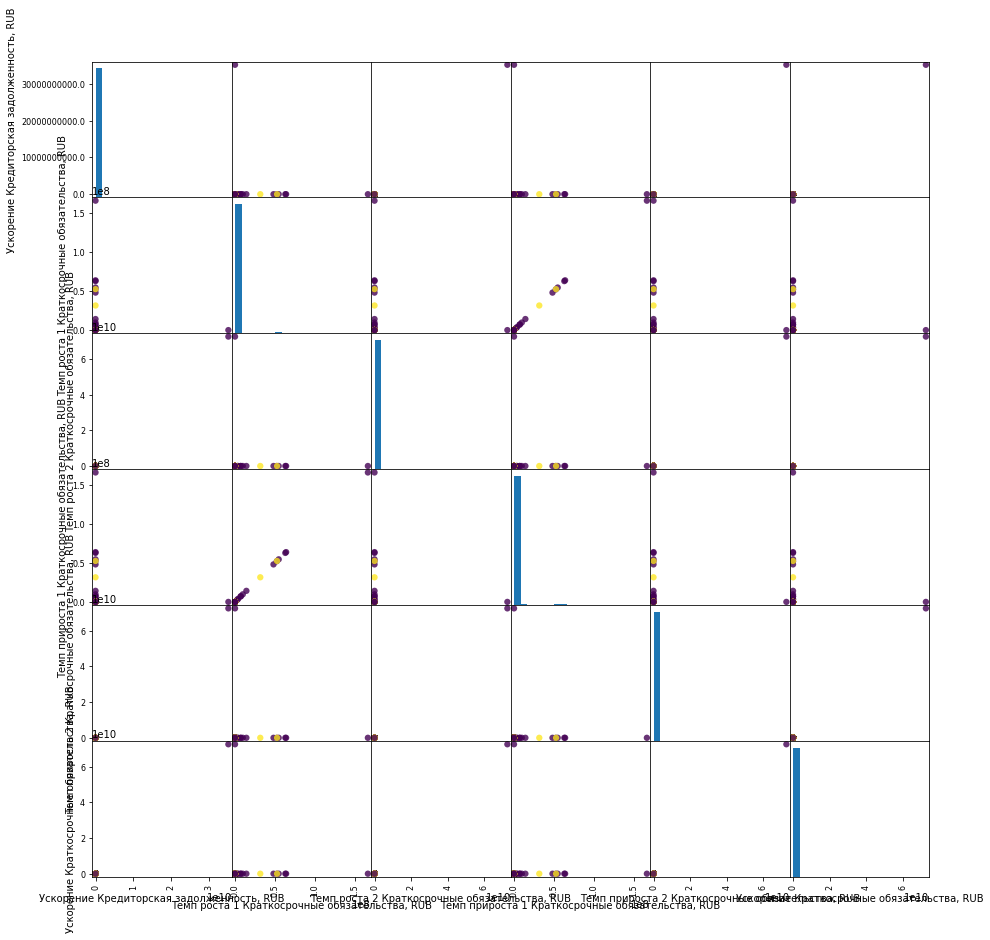

In [63]:
# Тоже видим плохое разделение по признаку

scat_mtrx = pd.plotting.scatter_matrix(df_2021[['Ускорение Кредиторская задолженность, RUB',
                                                 'Темп роста 1 Краткосрочные обязательства, RUB',
                                                 'Темп роста 2 Краткосрочные обязательства, RUB',
                                                 'Темп прироста 1 Краткосрочные обязательства, RUB',
                                                 'Темп прироста 2 Краткосрочные обязательства, RUB',
                                                 'Ускорение Краткосрочные обязательства, RUB']], 
                                      c=target_2021_01, figsize=(15, 15), marker='o', hist_kwds={'bins':20}, s=40, alpha=.8)


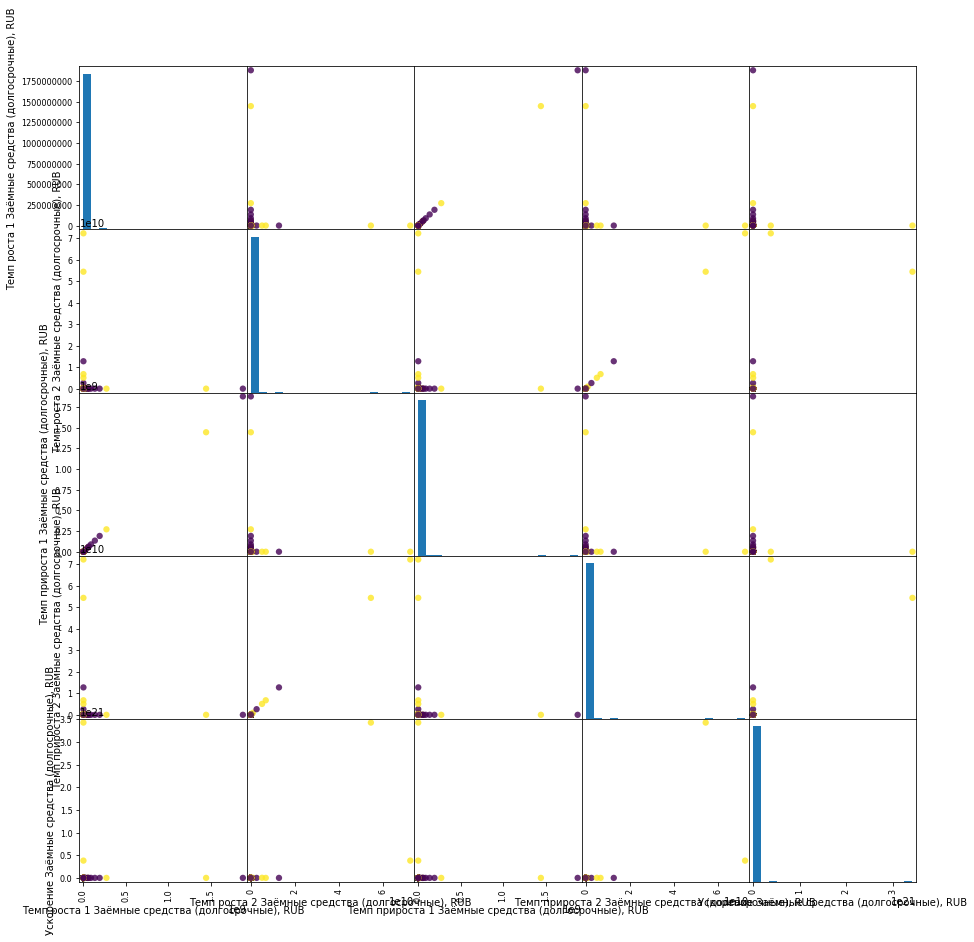

In [64]:
scat_mtrx = pd.plotting.scatter_matrix(df_2021[['Темп роста 1 Заёмные средства (долгосрочные), RUB',
                                                 'Темп роста 2 Заёмные средства (долгосрочные), RUB',
                                                 'Темп прироста 1 Заёмные средства (долгосрочные), RUB',
                                                 'Темп прироста 2 Заёмные средства (долгосрочные), RUB',
                                                 'Ускорение Заёмные средства (долгосрочные), RUB']], 
                                      c=target_2021_01, figsize=(15, 15),marker='o', hist_kwds={'bins':20}, s=40, alpha=.8)


Сформируем еще базы данных для обучения - уберем коэффициенты, оставив только динамику

In [65]:
drop_list_coef = []
def drop_col_coef(data):
    drop_list = []
    for col in data.columns:
        if 'K_' in col:
            drop_list_coef.append(col)
        
        
    data = data.drop(drop_list_coef, axis=1)   
        
    return data

In [66]:
df_2019_not_coef = drop_col_coef(df_2019)
df_2020_not_coef = drop_col_coef(df_2020)
df_2021_not_coef = drop_col_coef(df_2021)

**Данные плохо разделены для классификации. Посмотрим разные модели.**

In [67]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, normalize, RobustScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, RidgeClassifierCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import NuSVC, SVC
from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, f1_score, fbeta_score

D:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [68]:
# Выборка с коэффициентами - Обучаем на 2019, тестим на 2020
clf = LazyClassifier(verbose=0, custom_metric=None, random_state=42) # ignore_warnings=True,
models, predictions = clf.fit(df_2019, df_2020, target_2019_01, target_2020_01)
models.sort_values('F1 Score', ascending=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 10.52it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearSVC,0.70,0.60,0.60,0.70,0.08
RidgeClassifier,0.70,0.58,0.58,0.69,0.02
RidgeClassifierCV,0.69,0.57,0.57,0.69,0.04
LogisticRegression,0.68,0.58,0.58,0.69,0.03
XGBClassifier,0.67,0.59,0.59,0.68,1.12
NuSVC,0.66,0.62,0.62,0.68,0.04
RandomForestClassifier,0.66,0.60,0.60,0.68,0.16
BernoulliNB,0.70,0.54,0.54,0.68,0.01
LinearDiscriminantAnalysis,0.68,0.56,0.56,0.68,0.04


In [69]:
# Выборка с коэффициентами - Обучаем на 2020, тестим на 2021
clf = LazyClassifier(verbose=0, custom_metric=None, random_state=42) # ignore_warnings=True,
models, predictions = clf.fit(df_2019, df_2020, target_2019_01, target_2020_01)
models.sort_values('F1 Score', ascending=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 16.93it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearSVC,0.70,0.60,0.60,0.70,0.08
RidgeClassifier,0.70,0.58,0.58,0.69,0.02
RidgeClassifierCV,0.69,0.57,0.57,0.69,0.04
LogisticRegression,0.68,0.58,0.58,0.69,0.03
XGBClassifier,0.67,0.59,0.59,0.68,0.11
NuSVC,0.66,0.62,0.62,0.68,0.04
RandomForestClassifier,0.66,0.60,0.60,0.68,0.16
BernoulliNB,0.70,0.54,0.54,0.68,0.01
LinearDiscriminantAnalysis,0.68,0.56,0.56,0.68,0.04


In [70]:
# Выборка без коэффициентов - Обучаем на 2019, тестим на 2020
clf = LazyClassifier(verbose=0, custom_metric=None, random_state=42) # ignore_warnings=True,
models, predictions = clf.fit(df_2019_not_coef, df_2020_not_coef, target_2019_01, target_2020_01)
models.sort_values('F1 Score', ascending=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 18.35it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RidgeClassifier,0.71,0.58,0.58,0.70,0.01
RandomForestClassifier,0.69,0.62,0.62,0.70,0.16
RidgeClassifierCV,0.70,0.58,0.58,0.70,0.04
LinearDiscriminantAnalysis,0.68,0.57,0.57,0.69,0.04
AdaBoostClassifier,0.67,0.61,0.61,0.68,0.13
LinearSVC,0.68,0.57,0.57,0.68,0.07
SVC,0.70,0.54,0.54,0.68,0.03
NuSVC,0.67,0.57,0.57,0.68,0.04
LogisticRegression,0.67,0.57,0.57,0.68,0.03


In [71]:
# Выборка без коэффициентов - Обучаем на 2020, тестим на 2021
clf = LazyClassifier(verbose=0, custom_metric=None, random_state=42) # ignore_warnings=True,
models, predictions = clf.fit(df_2020_not_coef, df_2021_not_coef, target_2020_01, target_2021_01)
models.sort_values('F1 Score', ascending=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 19.02it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,0.68,0.55,0.55,0.60,0.01
PassiveAggressiveClassifier,0.59,0.61,0.61,0.60,0.01
DummyClassifier,0.42,0.50,0.50,0.39,0.01
Perceptron,0.42,0.51,0.51,0.38,0.01
BaggingClassifier,0.39,0.48,0.48,0.35,0.06
ExtraTreeClassifier,0.37,0.45,0.45,0.34,0.01
DecisionTreeClassifier,0.38,0.47,0.47,0.34,0.02
XGBClassifier,0.36,0.48,0.48,0.29,0.09
AdaBoostClassifier,0.35,0.47,0.47,0.28,0.13


In [72]:
# Такое у нас соотношение
target_2020_01.value_counts()

 1    247
-1     78
Name: target_2020 01, dtype: int64

Создадим функцию для обучения несколькими моделями:

In [73]:
def metrics(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    print('Матрица:')
    print(conf_matrix)
    precision = precision_score(y_test, y_pred).round(4)
    print('точность (precision) - ', precision)
    recall = recall_score(y_test, y_pred).round(4)
    print('полнота (recall) -', recall)
    roc_auc = roc_auc_score(y_test, y_pred).round(4)
    print('roc_auc - ', roc_auc)
    f1 = f1_score(y_test, y_pred).round(4)
    print('f1_score - ', f1)
    return {'conf_matrix': conf_matrix, 'precision': precision, 'recall': recall, 'roc_auc': roc_auc, 'f1': f1} 


def model_training(X_train, y_train, X_test, y_test):
    metrixs_list={}
    try:
        print('Модель - RandomForestClassifier')
        model_rfc = RandomForestClassifier(random_state=42)
        model_rfc.fit(X_train, y_train)
        y_pred_rfc = model_rfc.predict(X_test)
        metrixs_list['RandomForestClassifier'] = metrics(y_test, y_pred_rfc)
    except Exception as e:
        print('RandomForestClassifier - ошибка!!!')
        print(e)
    print()
    print('   ***   ***   ***')    
    
    try:
        print('Модель - RidgeClassifier')
        model_rc = RidgeClassifier(random_state=42)
        model_rc.fit(X_train, y_train)
        y_pred_rc = model_rc.predict(X_test)
        metrixs_list['RidgeClassifier'] = metrics(y_test, y_pred_rc)
    except Exception as e:
        print('RidgeClassifier - ошибка!!!')
        print(e)
    print()
    print('   ***   ***   ***')    
    
    try:
        print('Модель - KNeighborsClassifier')
        model_knn = KNeighborsClassifier(n_neighbors=5)
        model_knn.fit(X_train, y_train)
        y_pred_knn = model_knn.predict(X_test)
        metrixs_list['KNeighborsClassifier'] = metrics(y_test, y_pred_knn)
    except Exception as e:
        print('KNeighborsClassifier - ошибка!!!')
        print(e) 
    print()
    print('   ***   ***   ***')    
    
    try:
        print('Модель - LogisticRegression')
        scaler_ss = StandardScaler()
        X_train_ss = scaler_ss.fit_transform(X_train)
        X_test_ss = scaler_ss.transform(X_test)
        
        model_lr_ss = LogisticRegression(random_state=42)
        model_lr_ss.fit(X_train_ss, y_train)
        y_pred_lr_ss = model_lr_ss.predict(X_test_ss)
        metrixs_list['LogisticRegression'] = metrics(y_test, y_pred_lr_ss)
    except Exception as e:
        print('LogisticRegression - ошибка!!!')
        print(e)       
    print()
    print('   ***   ***   ***')    
    
    try:
        print('Модель - AdaBoostClassifier на базе LogisticRegression')
        model_abc = AdaBoostClassifier(base_estimator=model_lr_ss, random_state=42)
        model_abc.fit(X_train_ss, y_train)
        y_pred_abc = model_abc.predict(X_test)
        metrixs_list['AdaBoostClassifier на LogRes'] = metrics(y_test, y_pred_abc)
    except Exception as e:
        print('AdaBoostClassifier - ошибка!!!')
        print(e)  
        
        
        
       
        
        
        
        
    return metrixs_list
    

In [74]:
metrixs_19_20 = model_training(df_2019, target_2019_01, df_2020, target_2020_01)

Модель - RandomForestClassifier
Матрица:
[[ 28  50]
 [ 51 196]]
точность (precision) -  0.7967
полнота (recall) - 0.7935
roc_auc -  0.5762
f1_score -  0.7951

   ***   ***   ***
Модель - RidgeClassifier
Матрица:
[[ 11  67]
 [ 30 217]]
точность (precision) -  0.7641
полнота (recall) - 0.8785
roc_auc -  0.5098
f1_score -  0.8173

   ***   ***   ***
Модель - KNeighborsClassifier
Матрица:
[[ 28  50]
 [ 69 178]]
точность (precision) -  0.7807
полнота (recall) - 0.7206
roc_auc -  0.5398
f1_score -  0.7495

   ***   ***   ***
Модель - LogisticRegression
Матрица:
[[ 31  47]
 [ 57 190]]
точность (precision) -  0.8017
полнота (recall) - 0.7692
roc_auc -  0.5833
f1_score -  0.7851

   ***   ***   ***
Модель - AdaBoostClassifier на базе LogisticRegression
Матрица:
[[ 30  48]
 [115 132]]
точность (precision) -  0.7333
полнота (recall) - 0.5344
roc_auc -  0.4595
f1_score -  0.6183


In [75]:
print('обучение на df_2019, прогноз на df_2020')
df_metrixs_19_20 = pd.DataFrame(metrixs_19_20).T
df_metrixs_19_20

обучение на df_2019, прогноз на df_2020


,conf_matrix,precision,recall,roc_auc,f1
RandomForestClassifier,"[[28, 50], [51, 196]]",0.80,0.79,0.58,0.80
RidgeClassifier,"[[11, 67], [30, 217]]",0.76,0.88,0.51,0.82
KNeighborsClassifier,"[[28, 50], [69, 178]]",0.78,0.72,0.54,0.75
LogisticRegression,"[[31, 47], [57, 190]]",0.80,0.77,0.58,0.79
AdaBoostClassifier на LogRes,"[[30, 48], [115, 132]]",0.73,0.53,0.46,0.62


In [76]:
#metrixs_19_20['RandomForestClassifier']['conf_matrix'][0][0]

In [77]:
metrixs_20_21 = model_training(df_2020, target_2020_01, df_2021, target_2021_01)

Модель - RandomForestClassifier
Матрица:
[[  8 206]
 [ 13  98]]
точность (precision) -  0.3224
полнота (recall) - 0.8829
roc_auc -  0.4601
f1_score -  0.4723

   ***   ***   ***
Модель - RidgeClassifier
Матрица:
[[  6 208]
 [  7 104]]
точность (precision) -  0.3333
полнота (recall) - 0.9369
roc_auc -  0.4825
f1_score -  0.4917

   ***   ***   ***
Модель - KNeighborsClassifier
Матрица:
[[ 14 200]
 [  9 102]]
точность (precision) -  0.3377
полнота (recall) - 0.9189
roc_auc -  0.4922
f1_score -  0.4939

   ***   ***   ***
Модель - LogisticRegression
Матрица:
[[ 15 199]
 [ 19  92]]
точность (precision) -  0.3162
полнота (recall) - 0.8288
roc_auc -  0.4495
f1_score -  0.4577

   ***   ***   ***
Модель - AdaBoostClassifier на базе LogisticRegression
Матрица:
[[104 110]
 [ 63  48]]
точность (precision) -  0.3038
полнота (recall) - 0.4324
roc_auc -  0.4592
f1_score -  0.3569


In [78]:
print('обучение на df_2020, прогноз на df_2021')
df_metrixs_20_21 = pd.DataFrame(metrixs_20_21).T
df_metrixs_20_21

обучение на df_2020, прогноз на df_2021


,conf_matrix,precision,recall,roc_auc,f1
RandomForestClassifier,"[[8, 206], [13, 98]]",0.32,0.88,0.46,0.47
RidgeClassifier,"[[6, 208], [7, 104]]",0.33,0.94,0.48,0.49
KNeighborsClassifier,"[[14, 200], [9, 102]]",0.34,0.92,0.49,0.49
LogisticRegression,"[[15, 199], [19, 92]]",0.32,0.83,0.45,0.46
AdaBoostClassifier на LogRes,"[[104, 110], [63, 48]]",0.30,0.43,0.46,0.36


In [79]:
metrixs_19_20_not_coef = model_training(df_2019_not_coef, target_2019_01, df_2020_not_coef, target_2020_01)

Модель - RandomForestClassifier
Матрица:
[[ 24  54]
 [ 53 194]]
точность (precision) -  0.7823
полнота (recall) - 0.7854
roc_auc -  0.5466
f1_score -  0.7838

   ***   ***   ***
Модель - RidgeClassifier
Матрица:
[[  9  69]
 [ 20 227]]
точность (precision) -  0.7669
полнота (recall) - 0.919
roc_auc -  0.5172
f1_score -  0.8361

   ***   ***   ***
Модель - KNeighborsClassifier
Матрица:
[[ 26  52]
 [ 49 198]]
точность (precision) -  0.792
полнота (recall) - 0.8016
roc_auc -  0.5675
f1_score -  0.7968

   ***   ***   ***
Модель - LogisticRegression
Матрица:
[[ 29  49]
 [ 58 189]]
точность (precision) -  0.7941
полнота (recall) - 0.7652
roc_auc -  0.5685
f1_score -  0.7794

   ***   ***   ***
Модель - AdaBoostClassifier на базе LogisticRegression
Матрица:
[[ 22  56]
 [ 68 179]]
точность (precision) -  0.7617
полнота (recall) - 0.7247
roc_auc -  0.5034
f1_score -  0.7427


In [80]:
print('обучение на df_2019, прогноз на df_2020 без коэффициентов')
df_metrixs_19_20_not_coef = pd.DataFrame(metrixs_19_20_not_coef).T
df_metrixs_19_20_not_coef

обучение на df_2019, прогноз на df_2020 без коэффициентов


,conf_matrix,precision,recall,roc_auc,f1
RandomForestClassifier,"[[24, 54], [53, 194]]",0.78,0.79,0.55,0.78
RidgeClassifier,"[[9, 69], [20, 227]]",0.77,0.92,0.52,0.84
KNeighborsClassifier,"[[26, 52], [49, 198]]",0.79,0.80,0.57,0.80
LogisticRegression,"[[29, 49], [58, 189]]",0.79,0.77,0.57,0.78
AdaBoostClassifier на LogRes,"[[22, 56], [68, 179]]",0.76,0.72,0.50,0.74


In [81]:
metrixs_20_21_not_coef = model_training(df_2020_not_coef, target_2020_01, df_2021_not_coef, target_2021_01)

Модель - RandomForestClassifier
Матрица:
[[  4 210]
 [  9 102]]
точность (precision) -  0.3269
полнота (recall) - 0.9189
roc_auc -  0.4688
f1_score -  0.4823

   ***   ***   ***
Модель - RidgeClassifier
Матрица:
[[  5 209]
 [  4 107]]
точность (precision) -  0.3386
полнота (recall) - 0.964
roc_auc -  0.4937
f1_score -  0.5012

   ***   ***   ***
Модель - KNeighborsClassifier
Матрица:
[[ 24 190]
 [ 10 101]]
точность (precision) -  0.3471
полнота (recall) - 0.9099
roc_auc -  0.511
f1_score -  0.5025

   ***   ***   ***
Модель - LogisticRegression
Матрица:
[[  9 205]
 [ 12  99]]
точность (precision) -  0.3257
полнота (recall) - 0.8919
roc_auc -  0.467
f1_score -  0.4771

   ***   ***   ***
Модель - AdaBoostClassifier на базе LogisticRegression
Матрица:
[[ 48 166]
 [ 21  90]]
точность (precision) -  0.3516
полнота (recall) - 0.8108
roc_auc -  0.5176
f1_score -  0.4905


In [82]:
print('обучение на df_2020, прогноз на df_2021 без коэффициентов')
df_metrixs_20_21_not_coef = pd.DataFrame(metrixs_20_21_not_coef).T
df_metrixs_20_21_not_coef

обучение на df_2020, прогноз на df_2021 без коэффициентов


,conf_matrix,precision,recall,roc_auc,f1
RandomForestClassifier,"[[4, 210], [9, 102]]",0.33,0.92,0.47,0.48
RidgeClassifier,"[[5, 209], [4, 107]]",0.34,0.96,0.49,0.50
KNeighborsClassifier,"[[24, 190], [10, 101]]",0.35,0.91,0.51,0.50
LogisticRegression,"[[9, 205], [12, 99]]",0.33,0.89,0.47,0.48
AdaBoostClassifier на LogRes,"[[48, 166], [21, 90]]",0.35,0.81,0.52,0.49


<AxesSubplot:title={'center':'Метрики да базе c коэффиициентами 2020 - обучение, 2021 - тест'}>

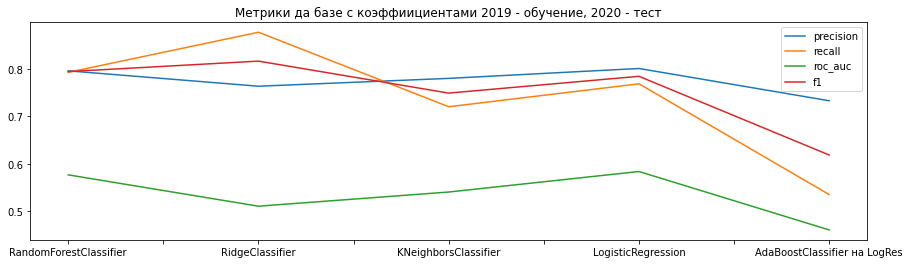

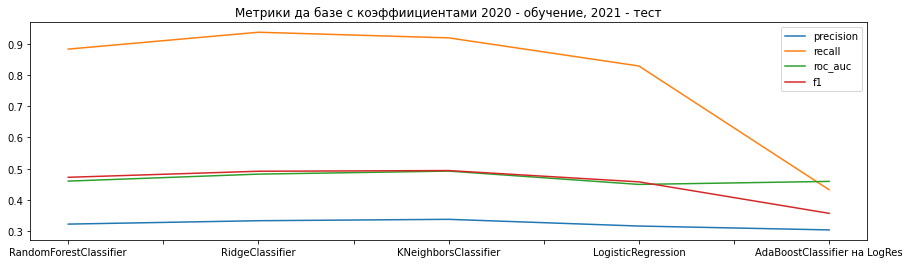

In [83]:
df_metrixs_19_20.plot(title='Метрики да базе c коэффиициентами 2019 - обучение, 2020 - тест', figsize=(15, 4))
df_metrixs_20_21.plot(title='Метрики да базе c коэффиициентами 2020 - обучение, 2021 - тест', figsize=(15, 4))

<AxesSubplot:title={'center':'Метрики да базе без коэффиициентов 2020 - обучение, 2021 - тест'}>

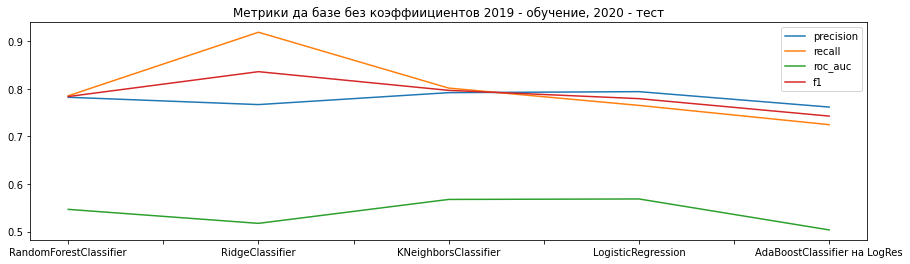

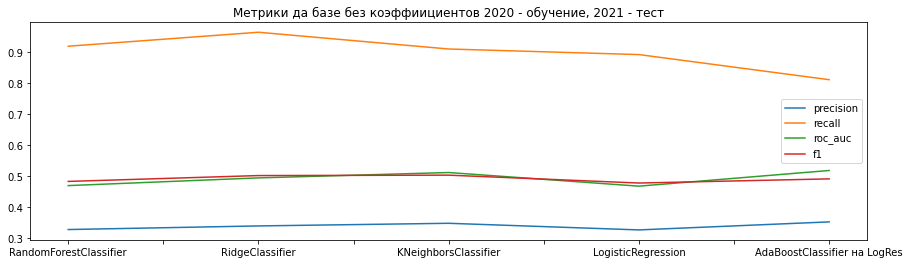

In [126]:
df_metrixs_19_20_not_coef.plot(title='Метрики да базе без коэффиициентов 2019 - обучение, 2020 - тест', figsize=(15, 4))
df_metrixs_20_21_not_coef.plot(title='Метрики да базе без коэффиициентов 2020 - обучение, 2021 - тест', figsize=(15, 4))

###  Пробные модели

**KNN (Метод ближайших соседей)**

In [85]:
# С Коэффициентами выборка
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(df_2019, target_2019_01)
y_pred_knn = model_knn.predict(df_2020)

In [86]:
print('Матрица:')
print(confusion_matrix(target_2020_01, y_pred_knn))
print('точность (precision) - ', precision_score(target_2020_01, y_pred_knn))
print('полнота (recall) -', recall_score(target_2020_01, y_pred_knn))
print('roc_auc - ',roc_auc_score(target_2020_01, y_pred_knn))
print('f1_score - ', f1_score(target_2020_01, y_pred_knn))

Матрица:
[[ 28  50]
 [ 69 178]]
точность (precision) -  0.7807017543859649
полнота (recall) - 0.7206477732793523
roc_auc -  0.5398110661268556
f1_score -  0.7494736842105263


In [87]:
# Без Коэффициентов выборка
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(df_2019_not_coef, target_2019_01)
y_pred_knn = model_knn.predict(df_2020_not_coef)

In [88]:
print('Матрица:')
print(confusion_matrix(target_2020_01, y_pred_knn))
print('точность (precision) - ', precision_score(target_2020_01, y_pred_knn))
print('полнота (recall) -', recall_score(target_2020_01, y_pred_knn))
print('roc_auc - ',roc_auc_score(target_2020_01, y_pred_knn))
print('f1_score - ', f1_score(target_2020_01, y_pred_knn))

Матрица:
[[ 26  52]
 [ 49 198]]
точность (precision) -  0.792
полнота (recall) - 0.8016194331983806
roc_auc -  0.5674763832658569
f1_score -  0.7967806841046278


**RandomForestClassifier**

In [89]:
# С Коэффициентами выборка
model_rfc = RandomForestClassifier(random_state=42)
model_rfc.fit(df_2019, target_2019_01)
y_pred_rfc = model_rfc.predict(df_2020)

In [90]:
print('Матрица:')
print(confusion_matrix(target_2020_01, y_pred_rfc))
print('точность (precision) - ', precision_score(target_2020_01, y_pred_rfc))
print('полнота (recall) -', recall_score(target_2020_01, y_pred_rfc))
print('roc_auc - ',roc_auc_score(target_2020_01, y_pred_rfc))
print('f1_score - ', f1_score(target_2020_01, y_pred_rfc))

Матрица:
[[ 28  50]
 [ 51 196]]
точность (precision) -  0.7967479674796748
полнота (recall) - 0.7935222672064778
roc_auc -  0.5762483130904184
f1_score -  0.7951318458417851


In [91]:
# Подбор гипер параметров

random_grid = {'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
              'max_features': ['auto', 'sqrt'],
              'max_depth': [int(x) for x in np.linspace(start=10, stop=110, num=11)]+[None],
              'min_samples_split': [2,4,6,8,10],
              'min_samples_leaf': [1, 2, 3, 4, 5],
              'bootstrap': [True, False]}

rf_random = RandomizedSearchCV(estimator=model_rfc,
                                param_distributions=random_grid,
                                n_iter=100,
                                n_jobs=-1,
                                cv=3,
                                verbose=2,
                                random_state=42)
rf_random.fit(df_2020, target_2020_01)
best_param_rf = rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   56.5s finished


In [92]:
model_rfc_best = RandomForestClassifier(**best_param_rf, random_state=42)
model_rfc_best.fit(df_2019, target_2019_01)
y_pred_rfc_best = model_rfc.predict(df_2020)

In [93]:
model_rfc_best = RandomForestClassifier(**best_param_rf, random_state=42)
model_rfc_best.fit(df_2020, target_2020_01)
y_pred_rfc_best_21 = model_rfc.predict(df_2021)
print('Матрица:')
print(confusion_matrix(target_2021_01, y_pred_rfc_best_21))
print('точность (precision) - ', precision_score(target_2021_01, y_pred_rfc_best_21))
print('полнота (recall) -', recall_score(target_2021_01, y_pred_rfc_best_21))
print('roc_auc - ',roc_auc_score(target_2021_01, y_pred_rfc_best_21))
print('f1_score - ', f1_score(target_2021_01, y_pred_rfc_best_21))

Матрица:
[[ 42 172]
 [ 20  91]]
точность (precision) -  0.34600760456273766
полнота (recall) - 0.8198198198198198
roc_auc -  0.5080407510314052
f1_score -  0.4866310160427807


In [94]:
# Без Коэффициентов выборка
model_rfc = RandomForestClassifier(random_state=42)
model_rfc.fit(df_2019_not_coef, target_2019_01)
y_pred_rfc = model_rfc.predict(df_2020_not_coef)

In [95]:
print('Матрица:')
print(confusion_matrix(target_2020_01, y_pred_rfc))
print('точность (precision) - ', precision_score(target_2020_01, y_pred_rfc))
print('полнота (recall) -', recall_score(target_2020_01, y_pred_rfc))
print('roc_auc - ',roc_auc_score(target_2020_01, y_pred_rfc))
print('f1_score - ', f1_score(target_2020_01, y_pred_rfc))

Матрица:
[[ 24  54]
 [ 53 194]]
точность (precision) -  0.782258064516129
полнота (recall) - 0.7854251012145749
roc_auc -  0.5465587044534413
f1_score -  0.7838383838383838


In [96]:
print('Матрица:')
print(confusion_matrix(target_2020_01, y_pred_rfc_best))
print('точность (precision) - ', precision_score(target_2020_01, y_pred_rfc_best))
print('полнота (recall) -', recall_score(target_2020_01, y_pred_rfc_best))
print('roc_auc - ',roc_auc_score(target_2020_01, y_pred_rfc_best))
print('f1_score - ', f1_score(target_2020_01, y_pred_rfc_best))

Матрица:
[[ 28  50]
 [ 51 196]]
точность (precision) -  0.7967479674796748
полнота (recall) - 0.7935222672064778
roc_auc -  0.5762483130904184
f1_score -  0.7951318458417851


**GaussianNB (Гауссовский наивный Байес)**

In [97]:
# С Коэффициентами выборка
model_nb = GaussianNB()
model_nb.fit(df_2019, target_2019_01)
y_pred_nb = model_nb.predict(df_2020)

In [98]:
print('Матрица:')
print(confusion_matrix(target_2020_01, y_pred_nb))
print('точность (precision) - ', precision_score(target_2020_01, y_pred_nb))
print('полнота (recall) -', recall_score(target_2020_01, y_pred_nb))
print('roc_auc - ',roc_auc_score(target_2020_01, y_pred_nb))
print('f1_score - ', f1_score(target_2020_01, y_pred_nb))

Матрица:
[[  1  77]
 [  0 247]]
точность (precision) -  0.7623456790123457
полнота (recall) - 1.0
roc_auc -  0.5064102564102564
f1_score -  0.8651488616462347


In [99]:
# Без Коэффициентов выборка
model_nb = GaussianNB()
model_nb.fit(df_2019_not_coef, target_2019_01)
y_pred_nb = model_nb.predict(df_2020_not_coef)

In [100]:
print('Матрица:')
print(confusion_matrix(target_2020_01, y_pred_nb))
print('точность (precision) - ', precision_score(target_2020_01, y_pred_nb))
print('полнота (recall) -', recall_score(target_2020_01, y_pred_nb))
print('roc_auc - ',roc_auc_score(target_2020_01, y_pred_nb))
print('f1_score - ', f1_score(target_2020_01, y_pred_nb))

Матрица:
[[  1  77]
 [  0 247]]
точность (precision) -  0.7623456790123457
полнота (recall) - 1.0
roc_auc -  0.5064102564102564
f1_score -  0.8651488616462347


**LogisticRegression**

In [101]:
# Дает лучший вариант

scaler_ss = StandardScaler()
df_2019_ss = scaler_ss.fit_transform(df_2019)
df_2020_ss = scaler_ss.transform(df_2020)
df_2021_ss = scaler_ss.transform(df_2021)
df_2019_ss_nc = scaler_ss.fit_transform(df_2019_not_coef)
df_2020_ss_nc = scaler_ss.transform(df_2020_not_coef)
df_2021_ss_nc = scaler_ss.transform(df_2021_not_coef)


In [102]:
model_lr_ss = LogisticRegression(random_state=42)
model_lr_ss.fit(df_2019_ss, target_2019_01)
y_lr_pred_ss = model_lr_ss.predict(df_2020_ss)

In [103]:
print('Матрица:')
print(confusion_matrix(target_2020_01, y_lr_pred_ss))
print('точность (precision) - ', precision_score(target_2020_01, y_lr_pred_ss))
print('полнота (recall) -', recall_score(target_2020_01, y_lr_pred_ss))
print('roc_auc - ',roc_auc_score(target_2020_01, y_lr_pred_ss))
print('f1_score - ', f1_score(target_2020_01, y_lr_pred_ss))

Матрица:
[[ 31  47]
 [ 57 190]]
точность (precision) -  0.8016877637130801
полнота (recall) - 0.7692307692307693
roc_auc -  0.5833333333333334
f1_score -  0.7851239669421488


In [104]:
model_lr_ss.predict_proba(df_2020_ss).round(2)[:5]

array([[0.42, 0.58],
       [0.56, 0.44],
       [0.03, 0.97],
       [0.71, 0.29],
       [0.18, 0.82]])

In [105]:
# Мультиклассификатор
model_lr_ss_mc = LogisticRegression(random_state=42, multi_class='ovr')
model_lr_ss_mc.fit(df_2019_ss, target_2019_01234)
y_lr_pred_ss_mc = model_lr_ss_mc.predict(df_2020_ss)

In [106]:
print('Матрица:')
print(confusion_matrix(target_2020_01234, y_lr_pred_ss_mc))


Матрица:
[[ 35  36   3   1   3]
 [ 54 130   4   2   3]
 [  5  20   3   0   1]
 [ 10   8   0   2   0]
 [  0   1   1   0   3]]


In [107]:
# Работает чуть хуже, чем StandardScaler

scaler_mms = MinMaxScaler()
df_2019_mms = scaler_mms.fit_transform(df_2019)
df_2020_mms = scaler_mms.transform(df_2020)
df_2021_mms = scaler_mms.transform(df_2021)

In [108]:
model_lr_mms = LogisticRegression(random_state=42)
model_lr_mms.fit(df_2019_mms, target_2019_01)
y_lr_pred_mms = model_lr_mms.predict(df_2020_mms)

In [109]:
print('Матрица:')
print(confusion_matrix(target_2020_01, y_lr_pred_mms))
print('точность (precision) - ', precision_score(target_2020_01, y_lr_pred_mms))
print('полнота (recall) -', recall_score(target_2020_01, y_lr_pred_mms))
print('roc_auc - ',roc_auc_score(target_2020_01, y_lr_pred_mms))
print('f1_score - ', f1_score(target_2020_01, y_lr_pred_mms))

Матрица:
[[ 22  56]
 [ 46 201]]
точность (precision) -  0.7821011673151751
полнота (recall) - 0.8137651821862348
roc_auc -  0.5479082321187585
f1_score -  0.7976190476190476


In [110]:
# Плохо работает

scaler_rs = RobustScaler()
df_2019_rs = scaler_rs.fit_transform(df_2019)
df_2020_rs = scaler_rs.transform(df_2020)
df_2021_rs = scaler_rs.transform(df_2021)

In [111]:
model_lr_rs = LogisticRegression(random_state=42)
model_lr_rs.fit(df_2019_rs, target_2019_01)
y_lr_pred_rs = model_lr_rs.predict(df_2020_rs)

In [112]:
print('Матрица:')
print(confusion_matrix(target_2020_01, y_lr_pred_rs))
print('точность (precision) - ', precision_score(target_2020_01, y_lr_pred_rs))
print('полнота (recall) -', recall_score(target_2020_01, y_lr_pred_rs))
print('roc_auc - ',roc_auc_score(target_2020_01, y_lr_pred_rs))
print('f1_score - ', f1_score(target_2020_01, y_lr_pred_rs))

Матрица:
[[ 78   0]
 [247   0]]
точность (precision) -  0.0
полнота (recall) - 0.0
roc_auc -  0.5
f1_score -  0.0


In [113]:
# Плохо работает

df_2019_norm = normalize(df_2019)
df_2020_norm = normalize(df_2020)
df_2021_norm = normalize(df_2021)

In [114]:
model_lr_norm = LogisticRegression(random_state=42)
model_lr_norm.fit(df_2019_norm, target_2019_01)
y_lr_pred_norm = model_lr_norm.predict(df_2020_norm)

In [115]:
print('Матрица:')
print(confusion_matrix(target_2020_01, y_lr_pred_norm))
print('точность (precision) - ', precision_score(target_2020_01, y_lr_pred_norm))
print('полнота (recall) -', recall_score(target_2020_01, y_lr_pred_norm))
print('roc_auc - ',roc_auc_score(target_2020_01, y_lr_pred_norm))
print('f1_score - ', f1_score(target_2020_01, y_lr_pred_norm))

Матрица:
[[ 10  68]
 [ 34 213]]
точность (precision) -  0.7580071174377224
полнота (recall) - 0.8623481781376519
roc_auc -  0.49527665317139
f1_score -  0.8068181818181819


**NuSVC и SVC**

In [116]:
model_NuSVC = NuSVC(random_state=42)
model_NuSVC.fit(df_2019, target_2019_01)
y_pred_NuSVC = model_NuSVC.predict(df_2020)

In [117]:
print('Матрица:')
print(confusion_matrix(target_2020_01, y_pred_NuSVC))
print('точность (precision) - ', precision_score(target_2020_01, y_pred_NuSVC))
print('полнота (recall) -', recall_score(target_2020_01, y_pred_NuSVC))
print('roc_auc - ',roc_auc_score(target_2020_01, y_pred_NuSVC))
print('f1_score - ', f1_score(target_2020_01, y_pred_NuSVC))

Матрица:
[[  0  78]
 [  2 245]]
точность (precision) -  0.7585139318885449
полнота (recall) - 0.9919028340080972
roc_auc -  0.4959514170040486
f1_score -  0.8596491228070176


In [118]:
# Без коэффициентов выборка
model_NuSVC = NuSVC(random_state=42)
model_NuSVC.fit(df_2019_not_coef, target_2019_01)
y_pred_NuSVC = model_NuSVC.predict(df_2020_not_coef)

In [119]:
print('Матрица:')
print(confusion_matrix(target_2020_01, y_pred_NuSVC))
print('точность (precision) - ', precision_score(target_2020_01, y_pred_NuSVC))
print('полнота (recall) -', recall_score(target_2020_01, y_pred_NuSVC))
print('roc_auc - ',roc_auc_score(target_2020_01, y_pred_NuSVC))
print('f1_score - ', f1_score(target_2020_01, y_pred_NuSVC))

Матрица:
[[  0  78]
 [  2 245]]
точность (precision) -  0.7585139318885449
полнота (recall) - 0.9919028340080972
roc_auc -  0.4959514170040486
f1_score -  0.8596491228070176


In [120]:
model_SVC = SVC(random_state=42)
model_SVC.fit(df_2019, target_2019_01)
y_pred_SVC = model_SVC.predict(df_2020)

In [121]:
print('Матрица:')
print(confusion_matrix(target_2020_01, y_pred_SVC))
print('точность (precision) - ', precision_score(target_2020_01, y_pred_SVC))
print('полнота (recall) -', recall_score(target_2020_01, y_pred_SVC))
print('roc_auc - ',roc_auc_score(target_2020_01, y_pred_SVC))
print('f1_score - ', f1_score(target_2020_01, y_pred_SVC))

Матрица:
[[  0  78]
 [  0 247]]
точность (precision) -  0.76
полнота (recall) - 1.0
roc_auc -  0.5
f1_score -  0.8636363636363636


In [122]:
# Без коэффициентов выборка
model_SVC = SVC(random_state=42)
model_SVC.fit(df_2019_not_coef, target_2019_01)
y_pred_SVC = model_SVC.predict(df_2020_not_coef)

In [123]:
print('Матрица:')
print(confusion_matrix(target_2020_01, y_pred_SVC))
print('точность (precision) - ', precision_score(target_2020_01, y_pred_SVC))
print('полнота (recall) -', recall_score(target_2020_01, y_pred_SVC))
print('roc_auc - ',roc_auc_score(target_2020_01, y_pred_SVC))
print('f1_score - ', f1_score(target_2020_01, y_pred_SVC))

Матрица:
[[  0  78]
 [  0 247]]
точность (precision) -  0.76
полнота (recall) - 1.0
roc_auc -  0.5
f1_score -  0.8636363636363636


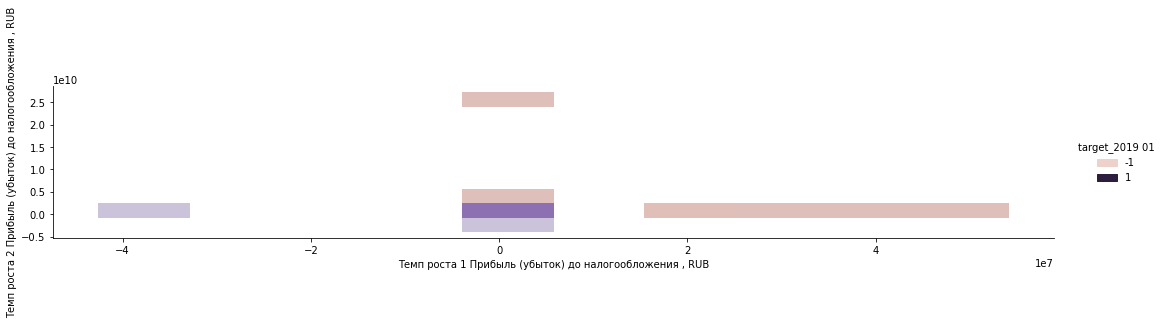

In [124]:
sns.displot(df_2019, x = 'Темп роста 1 Прибыль (убыток) до налогообложения , RUB', y='Темп роста 2 Прибыль (убыток) до налогообложения , RUB', hue=target_2019_01, aspect=5, alpha=1, bins=10, height=3)

In [125]:
df_2019.columns

Index(['K_9 1', 'K_10 1', 'K_11 1', 'K_12 1', 'K_17 1', 'K_18 1', 'K_20 1',
       'K_9 2', 'K_10 2', 'K_11 2',
       ...
       'Темп роста 1 Прибыль (убыток) до налогообложения , RUB',
       'Темп роста 2 Прибыль (убыток) до налогообложения , RUB',
       'Темп прироста 1 Прибыль (убыток) до налогообложения , RUB',
       'Темп прироста 2 Прибыль (убыток) до налогообложения , RUB',
       'Ускорение Прибыль (убыток) до налогообложения , RUB',
       'Темп роста 1 Прибыль (убыток) от продажи, RUB',
       'Темп роста 2 Прибыль (убыток) от продажи, RUB',
       'Темп прироста 1 Прибыль (убыток) от продажи, RUB',
       'Темп прироста 2 Прибыль (убыток) от продажи, RUB',
       'Ускорение Прибыль (убыток) от продажи, RUB'],
      dtype='object', length=134)

**StackingClassifier**